zzzz

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import f as f_dist
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error



# **DataSetup**

In [85]:
body_composition_url = "https://raw.githubusercontent.com/monozi/CCDATSCL_COM222_PROJECT/main/DATA%20(WEEKLY)/WEEK%201-10%20DATASET/body_composition.csv"
food_intake_url = "https://raw.githubusercontent.com/monozi/CCDATSCL_COM222_PROJECT/main/DATA%20(WEEKLY)/WEEK%201-10%20DATASET/food_intake.csv"
workout_log_url = "https://raw.githubusercontent.com/monozi/CCDATSCL_COM222_PROJECT/main/DATA%20(WEEKLY)/WEEK%201-10%20DATASET/workout_log.csv"

body_composition_df = pd.read_csv(body_composition_url)
food_intake_df = pd.read_csv(food_intake_url)
workout_log_df = pd.read_csv(workout_log_url)

print("Dataset loaded successfully!")

Dataset loaded successfully!


In [86]:
print("Food Intake Info:")
food_intake_df.info()
food_intake_df.head()

Food Intake Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            70 non-null     object
 1   total_calories  70 non-null     object
 2   total_protein   70 non-null     int64 
 3   water_intake    70 non-null     object
 4   crea_intake     70 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.9+ KB


,date,total_calories,total_protein,water_intake,crea_intake
0,24-Nov,"1,102",22,2 L,5g
1,25-Nov,"1,171",60,2.5 L,5g
2,26-Nov,"2,831",104,2 L,5g
3,27-Nov,811,25,2.5 L,5g
4,28-Nov,"1,120",31,3 L,5g


In [87]:
print("Body Composition Info:")
body_composition_df.info()
body_composition_df.head()

Body Composition Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   week         11 non-null     int64 
 1   date         11 non-null     object
 2   weight       11 non-null     object
 3   shoulders    11 non-null     object
 4   arm          11 non-null     object
 5   forearm      11 non-null     object
 6   chest        11 non-null     object
 7   waist        11 non-null     object
 8   hips         11 non-null     object
 9   thigh        11 non-null     object
 10  body_fat     11 non-null     object
 11  muscle_mass  11 non-null     object
dtypes: int64(1), object(11)
memory usage: 1.2+ KB


,week,date,weight,shoulders,arm,forearm,chest,waist,hips,thigh,body_fat,muscle_mass
0,0,24-Nov,66 kg,47 cm,31.5 cm,27.5 cm,92 cm,85 cm,92 cm,57 cm,22%,29.2 kg
1,1,1-Dec,67.5 kg,48 cm,32 cm,28 cm,93 cm,86 cm,93 cm,58 cm,21%,30.1 kg
2,2,8-Dec,72.55 kg,48 cm,32 cm,28 cm,94 cm,85 cm,96 cm,58 cm,23.20%,31.5 kg
3,3,15-Dec,71.5 kg,49 cm,32.5 cm,28.5 cm,94 cm,85 cm,94.5 cm,57 cm,22%,31.8 kg
4,4,22-Dec,70.7 kg,50 cm,32.5 cm,28.5 cm,95 cm,84 cm,93 cm,56 cm,20.50%,32.2 kg


In [88]:
print("Workout Log Info:")
workout_log_df.info()
workout_log_df.head()

Workout Log Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  264 non-null    object 
 1   workout_category      264 non-null    object 
 2   workout_type          264 non-null    object 
 3   workout_name          264 non-null    object 
 4   sets                  264 non-null    int64  
 5   reps                  264 non-null    int64  
 6   weight_kg             264 non-null    float64
 7   volume_load_kg        264 non-null    float64
 8   estimated_one_repMax  264 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 18.7+ KB


,date,workout_category,workout_type,workout_name,sets,reps,weight_kg,volume_load_kg,estimated_one_repMax
0,24-Nov,Push,Chest (compound),Flat Bench Press,2,20,20.0,800.0,33.33
1,24-Nov,Push,Chest (isolation),Pec Deck,2,20,20.0,800.0,33.33
2,24-Nov,Pull,Back (vertical pull),Wide-Grip Lat Pulldown,2,20,20.0,800.0,33.33
3,24-Nov,Pull,Back (horizontal pull),Cable Row,2,20,32.5,1300.0,54.17
4,24-Nov,Push,Triceps,Front and Back Triceps Pushdown,2,12,15.0,360.0,21.00


# **Data Cleaning and Preprocessing**

In [89]:
# Removing units to easily convert it to float and to avoid any errors.
def clean_numeric(val):
    if isinstance(val, str):
        val = val.lower()
        for unit in ['kg', 'cm', 'l', 'g', '%', 'k', 'c', 'm']:
            val = val.replace(unit, '')
        val = val.replace(',', '').strip()
        try:
            return float(val)
        except ValueError:
            return np.nan
    return val

# cleaning food_intake data
for col in ['total_calories', 'total_protein', 'water_intake', 'crea_intake']:
    if col in food_intake_df.columns:
        food_intake_df[col] = food_intake_df[col].apply(clean_numeric)

# cleaning body_comp data
body_cols = ['weight', 'shoulders', 'arm', 'forearm', 'chest', 'waist', 'hips', 'thigh', 'body_fat', 'muscle_mass']
for col in body_cols:
    body_composition_df[col] = body_composition_df[col].apply(clean_numeric)

In [90]:
# standardization
start_date = pd.to_datetime('2025-11-24')

def parse_date_custom(date_str):
    if pd.isnull(date_str): return pd.NaT
    try:
        day, month = date_str.split('-')
        if 'Nov' in date_str or 'Dec' in date_str:
            year = '2025'
        else:
            year = '2026'
        return pd.to_datetime(f"{day}-{month}-{year}", format="%d-%b-%Y")
    except:
        return pd.NaT

for df in [body_composition_df, food_intake_df, workout_log_df]:
    df['date_obj'] = df['date'].apply(parse_date_custom)

def get_week_number(date_val):
    if pd.isnull(date_val): return -1
    days_diff = (date_val - start_date).days
    # Days 0-6 -> Week 0
    # Days 7-13 -> Week 1
    if days_diff < 0: return -1 # Should not happen based on start date
    return days_diff // 7

for df in [body_composition_df, food_intake_df, workout_log_df]:
    df['week'] = df['date_obj'].apply(get_week_number)

feb2 = pd.to_datetime('2026-02-02')
week10_check = (feb2 - start_date).days // 7
print(f"Feb 2 corresponds to Week: {week10_check}")


Feb 2 corresponds to Week: 10


In [91]:
# Feature Engineering (pivoting)

# weekly workout stats
weekly_workout_agg = workout_log_df.groupby('week').agg(
    total_sets=('sets', 'sum'),
    total_reps=('reps', 'sum'),
    total_volume_load=('volume_load_kg', 'sum'),
    avg_intensity_weight=('weight_kg', 'mean'),
    avg_e1rm=('estimated_one_repMax', 'mean')
).reset_index()

# weekly volume by category
pivot_vol = workout_log_df.pivot_table(index='week', columns='workout_category', values='volume_load_kg', aggfunc='sum', fill_value=0)
pivot_vol.columns = [f'vol_{c.lower()}' for c in pivot_vol.columns]

requested_cats = ['vol_core', 'vol_legs', 'vol_pull', 'vol_push']
for target in requested_cats:
    if target not in pivot_vol.columns:
        pivot_vol[target] = 0.0

# weekly nutrition stats
weekly_nutrition_agg = food_intake_df.groupby('week').agg(
    avg_calories=('total_calories', 'mean'),
    avg_protein=('total_protein', 'mean'),
    avg_water=('water_intake', 'mean'),
    creatine_days=('crea_intake', 'count')
).reset_index()


# **Data Merging**

In [92]:
# merging all weekly aggregates into one df
weekly_context = pd.merge(weekly_workout_agg, pivot_vol, on='week', how='outer')
weekly_context = pd.merge(weekly_context, weekly_nutrition_agg, on='week', how='outer')

# merging workout_log & food_intake
daily_df = pd.merge(workout_log_df, food_intake_df, on='date_obj', how='outer', suffixes=('_wrk', '_food'))

def coalesce_week(row):
    if pd.notnull(row.get('week_wrk')): return int(row['week_wrk'])
    if pd.notnull(row.get('week_food')): return int(row['week_food'])
    if pd.notnull(row['date_obj']):
        return int((row['date_obj'] - start_date).days // 7)
    return 0

daily_df['week'] = daily_df.apply(coalesce_week, axis=1)

# merging body_comp by week, dropping date columns from body_comp to avoid confusion
body_comp_weekly = body_composition_df.drop(columns=['date', 'date_obj'])
# Merge body comp (Week 0-10) onto daily data
# Note: daily_df has all days.

# Check if Week 10 exists in daily_df
if 10 not in daily_df['week'].values:
    # Create a placeholder row for Week 10 (Feb 2)
    week10_row = pd.DataFrame({'date_obj': [pd.to_datetime('2026-02-02')], 'week': [10]})
    daily_df = pd.concat([daily_df, week10_row], ignore_index=True)

daily_df_merged = pd.merge(daily_df, body_comp_weekly, on='week', how='outer') # Outer merge to ensure body_comp is included

# merging weekly aggregates (one "week" column for all)
final_df = pd.merge(daily_df_merged, weekly_context, on='week', how='left')

# date formatting
final_df['date'] = final_df['date_obj'].dt.strftime('%Y-%m-%d')

In [93]:
# Final data selection and formatting
target_cols = [
    'date', 'week',
    'weight', 'shoulders', 'arm', 'forearm', 'chest', 'waist', 'hips', 'thigh', 'body_fat', 'muscle_mass',
    'workout_category', 'workout_type', 'workout_name',
    'sets', 'reps', 'weight_kg', 'volume_load_kg', 'estimated_one_repMax',
    'total_sets', 'total_reps', 'total_volume_load', 'avg_intensity_weight', 'avg_e1rm',
    'vol_core', 'vol_legs', 'vol_pull', 'vol_push', 'vol_posteriorchain',
    'total_calories', 'total_protein', 'water_intake', 'crea_intake',
    'avg_calories', 'avg_protein', 'avg_water', 'creatine_days'
]

# Ensure cols exist
for c in target_cols:
    if c not in final_df.columns:
        final_df[c] = np.nan

# Select
final_df = final_df[target_cols]

# Sort
final_df = final_df.sort_values(by=['week', 'date', 'workout_category'])

# Fill Empty Cells with 0
final_df = final_df.fillna(0)

# Filter for Weeks 0-10 only (in case data goes beyond)
final_df = final_df[(final_df['week'] >= 0) & (final_df['week'] <= 10)]

In [94]:
# saving final df
final_df.to_csv('final_comprehensive_dataset.csv', index=False)

print("Final Dataset:", final_df.shape)
print("Unique Weeks:", final_df['week'].unique())

Final Dataset: (296, 38)
Unique Weeks: [ 0  1  2  3  4  5  6  7  8  9 10]


In [95]:
print(final_df.columns)
print(final_df.head())

Index(['date', 'week', 'weight', 'shoulders', 'arm', 'forearm', 'chest',
       'waist', 'hips', 'thigh', 'body_fat', 'muscle_mass', 'workout_category',
       'workout_type', 'workout_name', 'sets', 'reps', 'weight_kg',
       'volume_load_kg', 'estimated_one_repMax', 'total_sets', 'total_reps',
       'total_volume_load', 'avg_intensity_weight', 'avg_e1rm', 'vol_core',
       'vol_legs', 'vol_pull', 'vol_push', 'vol_posteriorchain',
       'total_calories', 'total_protein', 'water_intake', 'crea_intake',
       'avg_calories', 'avg_protein', 'avg_water', 'creatine_days'],
      dtype='object')
         date  week  weight  shoulders   arm  forearm  chest  waist  hips  \
2  2025-11-24     0    66.0       47.0  31.5     27.5   92.0   85.0  92.0   
3  2025-11-24     0    66.0       47.0  31.5     27.5   92.0   85.0  92.0   
5  2025-11-24     0    66.0       47.0  31.5     27.5   92.0   85.0  92.0   
0  2025-11-24     0    66.0       47.0  31.5     27.5   92.0   85.0  92.0   
1  2025-11-2

In [96]:
final_df['date'] = pd.to_datetime(final_df['date'])
final_df = final_df.drop(columns=['vol_posteriorchain'])
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 2 to 295
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  296 non-null    datetime64[ns]
 1   week                  296 non-null    int64         
 2   weight                296 non-null    float64       
 3   shoulders             296 non-null    float64       
 4   arm                   296 non-null    float64       
 5   forearm               296 non-null    float64       
 6   chest                 296 non-null    float64       
 7   waist                 296 non-null    float64       
 8   hips                  296 non-null    float64       
 9   thigh                 296 non-null    float64       
 10  body_fat              296 non-null    float64       
 11  muscle_mass           296 non-null    float64       
 12  workout_category      296 non-null    object        
 13  workout_type          296

In [97]:
final_df.isnull().sum()

,0
date,0
week,0
weight,0
shoulders,0
arm,0
forearm,0
chest,0
waist,0
hips,0
thigh,0


# **Data Analysis**

*Descriptive Statistics of the Data*

In [98]:
final_df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,296,2025-12-30 03:29:11.351351296,2025-11-24 00:00:00,2025-12-11 00:00:00,2026-01-02 00:00:00,2026-01-17 00:00:00,2026-02-02 00:00:00,NaN
week,296.0,4.783784,0.0,2.0,5.0,7.0,10.0,2.961998
weight,296.0,72.753378,66.0,70.7,73.5,75.3,77.0,3.505224
shoulders,296.0,50.635135,47.0,48.0,51.0,53.0,54.0,2.358249
arm,296.0,33.398649,31.5,32.0,33.0,35.0,35.0,1.349148
forearm,296.0,28.706081,27.5,28.0,29.0,29.0,30.0,0.697281
chest,296.0,94.810811,92.0,94.0,95.0,96.0,96.0,1.354722
waist,296.0,86.155405,84.0,85.0,86.0,87.0,88.0,1.35653
hips,296.0,94.423986,92.0,92.0,94.5,96.0,98.0,2.11455
thigh,296.0,58.956081,53.0,57.0,58.0,62.0,62.0,2.330657


*A. Anthropometric Measurements*

In [99]:
body_comp = ['week', 'weight', 'muscle_mass', 'body_fat', 'chest', 'shoulders', 'arm', 'waist', 'hips', 'thigh']
table1 = final_df[body_comp].describe().T
print("\n--- Anthropometric Descriptive Stats ---")
print(table1)


--- Anthropometric Descriptive Stats ---
             count       mean       std   min   25%   50%   75%   max
week         296.0   4.783784  2.961998   0.0   2.0   5.0   7.0  10.0
weight       296.0  72.753378  3.505224  66.0  70.7  73.5  75.3  77.0
muscle_mass  296.0  32.526689  1.715551  29.2  31.5  32.9  33.7  34.6
body_fat     296.0  21.649324  0.825237  20.0  21.0  21.8  22.0  23.2
chest        296.0  94.810811  1.354722  92.0  94.0  95.0  96.0  96.0
shoulders    296.0  50.635135  2.358249  47.0  48.0  51.0  53.0  54.0
arm          296.0  33.398649  1.349148  31.5  32.0  33.0  35.0  35.0
waist        296.0  86.155405  1.356530  84.0  85.0  86.0  87.0  88.0
hips         296.0  94.423986  2.114550  92.0  92.0  94.5  96.0  98.0
thigh        296.0  58.956081  2.330657  53.0  57.0  58.0  62.0  62.0


*B. Workout Performance*

In [100]:
workout_sum = ['total_volume_load', 'total_sets', 'total_reps', 'avg_e1rm']
active_weeks = final_df.query('total_volume_load > 0')
table2 = active_weeks[workout_sum].describe().T
print("\n--- Table 2: Training Descriptive Stats ---")
print(table2)


--- Table 2: Training Descriptive Stats ---
                   count          mean           std           min  \
total_volume_load  295.0  35508.913898  13231.669886  19780.000000   
total_sets         295.0     54.538983     11.086748     32.000000   
total_reps         295.0    669.322034    154.958941    430.000000   
avg_e1rm           295.0     47.192321      8.373926     33.464583   

                            25%         50%          75%           max  
total_volume_load  26580.000000  30672.0000  45881.30000  59040.000000  
total_sets            50.000000     54.0000     64.00000     70.000000  
total_reps           580.000000    635.0000    836.50000    893.000000  
avg_e1rm              39.495357     45.5525     54.86173     61.371714  


*C. Nutritional Adherence*

In [101]:
food_intake = ['week', 'avg_calories', 'avg_protein', 'avg_water']
table3 = final_df[food_intake].describe().T
print("\nTable 3: Nutritional Adherence (Week-by-Week)")
print(table3)


Table 3: Nutritional Adherence (Week-by-Week)
              count         mean         std  min          25%          50%  \
week          296.0     4.783784    2.961998  0.0     2.000000     5.000000   
avg_calories  296.0  2265.906853  407.124396  0.0  2188.285714  2341.571429   
avg_protein   296.0   102.521236   22.972953  0.0    94.142857   103.142857   
avg_water     296.0     2.412645    0.206236  0.0     2.285714     2.428571   

                      75%          max  
week             7.000000    10.000000  
avg_calories  2548.857143  2744.285714  
avg_protein    122.428571   125.285714  
avg_water        2.500000     2.714286  


*D. Volume by Body Part (week-by-week)*

In [102]:
vol_cols = ['week', 'vol_push', 'vol_pull', 'vol_legs', 'vol_core']
table4 = final_df[vol_cols].describe().T
print("\nTable 4: Volume Distribution by Body Part (Week-by-Week)")
print(table4)


Table 4: Volume Distribution by Body Part (Week-by-Week)
          count          mean          std  min      25%      50%      75%  \
week      296.0      4.783784     2.961998  0.0      2.0      5.0      7.0   
vol_push  296.0   7216.506757  2778.094877  0.0   5200.0   6976.0   8670.0   
vol_pull  296.0   9642.498649  3722.534806  0.0   6978.0   8210.0  11213.6   
vol_legs  296.0  18207.256757  8023.748354  0.0  13160.0  14926.0  23212.5   
vol_core  296.0    318.905405   649.832681  0.0     50.0     98.0    101.0   

              max  
week         10.0  
vol_push  12562.0  
vol_pull  16264.0  
vol_legs  33504.0  
vol_core   2034.0  


*Distribution Analysis for Key Variables*

In [103]:
def interpret_effect_size(d):
    """
    Interprets Cohen's d effect size according to standard conventions.
    Cohen's d measures the standardized difference between two means.

    Conventions:
    - Small effect: 0.2 ≤ d < 0.5 (noticeable but subtle difference)
    - Medium effect: 0.5 ≤ d < 0.8 (moderate difference)
    - Large effect: d ≥ 0.8 (substantial difference)
    """
    abs_d = abs(d)
    if abs_d >= 0.8:
        return "large"
    elif abs_d >= 0.5:
        return "medium"
    elif abs_d >= 0.2:
        return "small"
    else:
        return "negligible"

def interpret_correlation(r):
    """
    Interprets Pearson correlation coefficient strength.
    Correlation measures the linear relationship between two variables.

    r = +1: Perfect positive correlation
    r = 0: No linear relationship
    r = -1: Perfect negative correlation
    """
    abs_r = abs(r)
    if abs_r >= 0.7:
        strength = "strong"
    elif abs_r >= 0.4:
        strength = "moderate"
    elif abs_r >= 0.2:
        strength = "weak"
    else:
        strength = "very weak"

    direction = "positive" if r >= 0 else "negative"
    return f"{strength} {direction}"

def format_pvalue(p):
    """
    Formats p-values according to academic conventions.
    P-values represent the probability of obtaining results at least as
    extreme as observed, assuming the null hypothesis is true.
    """
    if p < 0.001:
        return "p < 0.001"
    elif p < 0.01:
        return f"p = {p:.4f}"
    elif p < 0.05:
        return f"p = {p:.4f}"
    else:
        return f"p = {p:.4f} (ns)"

def create_section_header(title):
    """Creates formatted section headers for output"""
    print("\n" + "="*80)
    print(title)
    print("="*80 + "\n")

def create_subsection_header(title):
    """Creates formatted subsection headers"""
    print("-"*80)
    print(title)
    print("-"*80 + "\n")

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

weekly_summary = final_df.groupby('week').agg({
    'weight': 'first',
    'muscle_mass': 'first',
    'body_fat': 'first',
    'chest': 'first',
    'shoulders': 'first',
    'arm': 'first',
    'waist': 'first',
    'hips': 'first',
    'thigh': 'first',
    'total_volume_load': 'first',
    'avg_calories': 'first',
    'avg_protein': 'first',
    'avg_e1rm': 'first',
    'avg_e1rm': 'first',
    'vol_push': 'first',
    'vol_pull': 'first',
    'vol_legs': 'first',
    'vol_core': 'first'
}).reset_index()

print(f"Data loaded successfully: {len(weekly_summary)} weeks of measurements")
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Weekly summary created: {weekly_summary.shape[0]} weeks")
print()

Data loaded successfully: 11 weeks of measurements
Dataset loaded: 264 rows, 11 columns
Weekly summary created: 11 weeks



✓ Saved: distribution_analysis.png



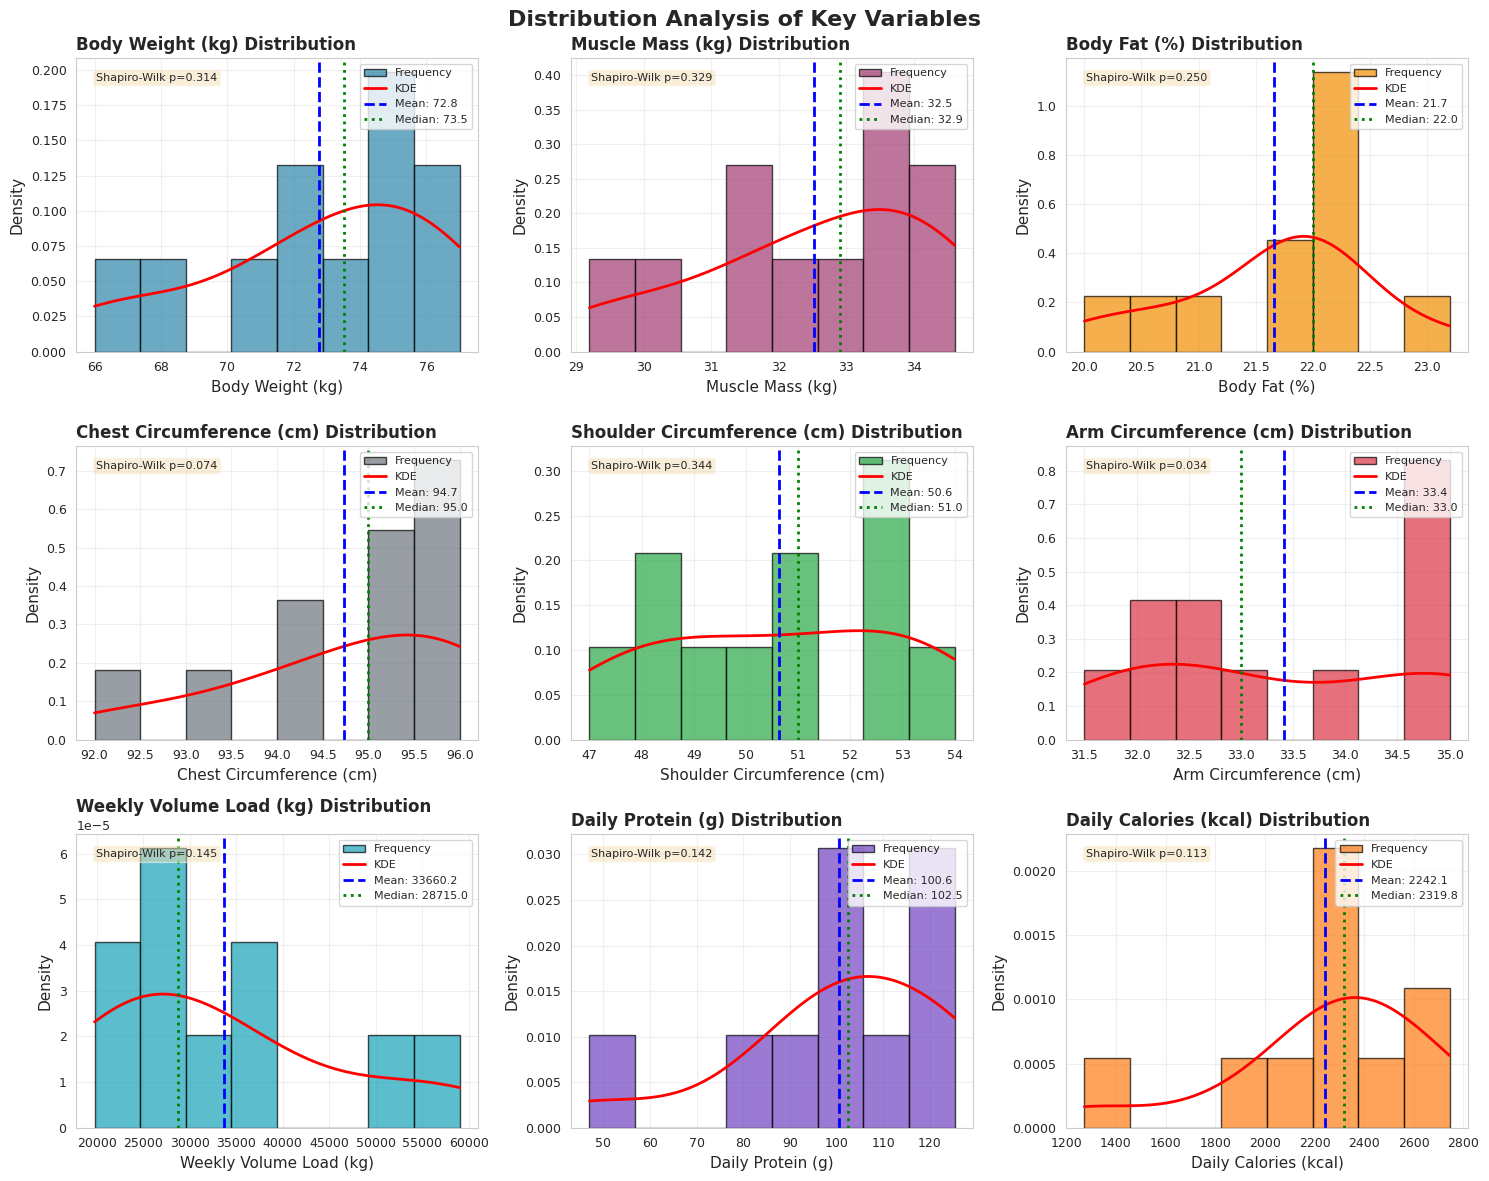

In [104]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribution Analysis of Key Variables',
             fontsize=16, fontweight='bold')

# Define variables to plot with their labels and colors
variables = [
    ('weight', 'Body Weight (kg)', '#2E86AB'),
    ('muscle_mass', 'Muscle Mass (kg)', '#A23B72'),
    ('body_fat', 'Body Fat (%)', '#F18F01'),
    ('chest', 'Chest Circumference (cm)', '#6C757D'),
    ('shoulders', 'Shoulder Circumference (cm)', '#28A745'),
    ('arm', 'Arm Circumference (cm)', '#DC3545'),
    ('total_volume_load', 'Weekly Volume Load (kg)', '#17A2B8'),
    ('avg_protein', 'Daily Protein (g)', '#6F42C1'),
    ('avg_calories', 'Daily Calories (kcal)', '#FD7E14')
]

for idx, (var, label, color) in enumerate(variables):
    ax = axes[idx // 3, idx % 3]

    # Get data, excluding zeros for volume/nutrition (Week 10 illness)
    data = weekly_summary[var]
    if var in ['total_volume_load', 'avg_protein', 'avg_calories']:
        data = data[data > 0]

    # Create histogram with KDE overlay
    ax.hist(data, bins=8, alpha=0.7, color=color, edgecolor='black',
            density=True, label='Frequency')

    # Add KDE (kernel density estimate) curve
    if len(data) > 2:
        from scipy.stats import gaussian_kde
        kde = gaussian_kde(data)
        x_range = np.linspace(data.min(), data.max(), 100)
        ax.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')

    # Add mean and median lines
    mean_val = data.mean()
    median_val = data.median()
    ax.axvline(mean_val, color='blue', linestyle='--', linewidth=2,
               label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color='green', linestyle=':', linewidth=2,
               label=f'Median: {median_val:.1f}')

    # Calculate and display normality test
    if len(data) >= 3:
        _, p_shapiro = stats.shapiro(data)
        normality_text = f'Shapiro-Wilk p={p_shapiro:.3f}'
        ax.text(0.05, 0.95, normality_text, transform=ax.transAxes,
                fontsize=8, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    ax.set_xlabel(label)
    ax.set_ylabel('Density')
    ax.set_title(f'{label} Distribution', fontweight='bold', loc='left')
    ax.legend(fontsize=8, loc='upper right')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('distribution_analysis.png',
            dpi=300, bbox_inches='tight')
print("✓ Saved: distribution_analysis.png")
print()

*Longitudinal Patterns with Trend Analysis*

✓ Saved: timeseries_trends.png



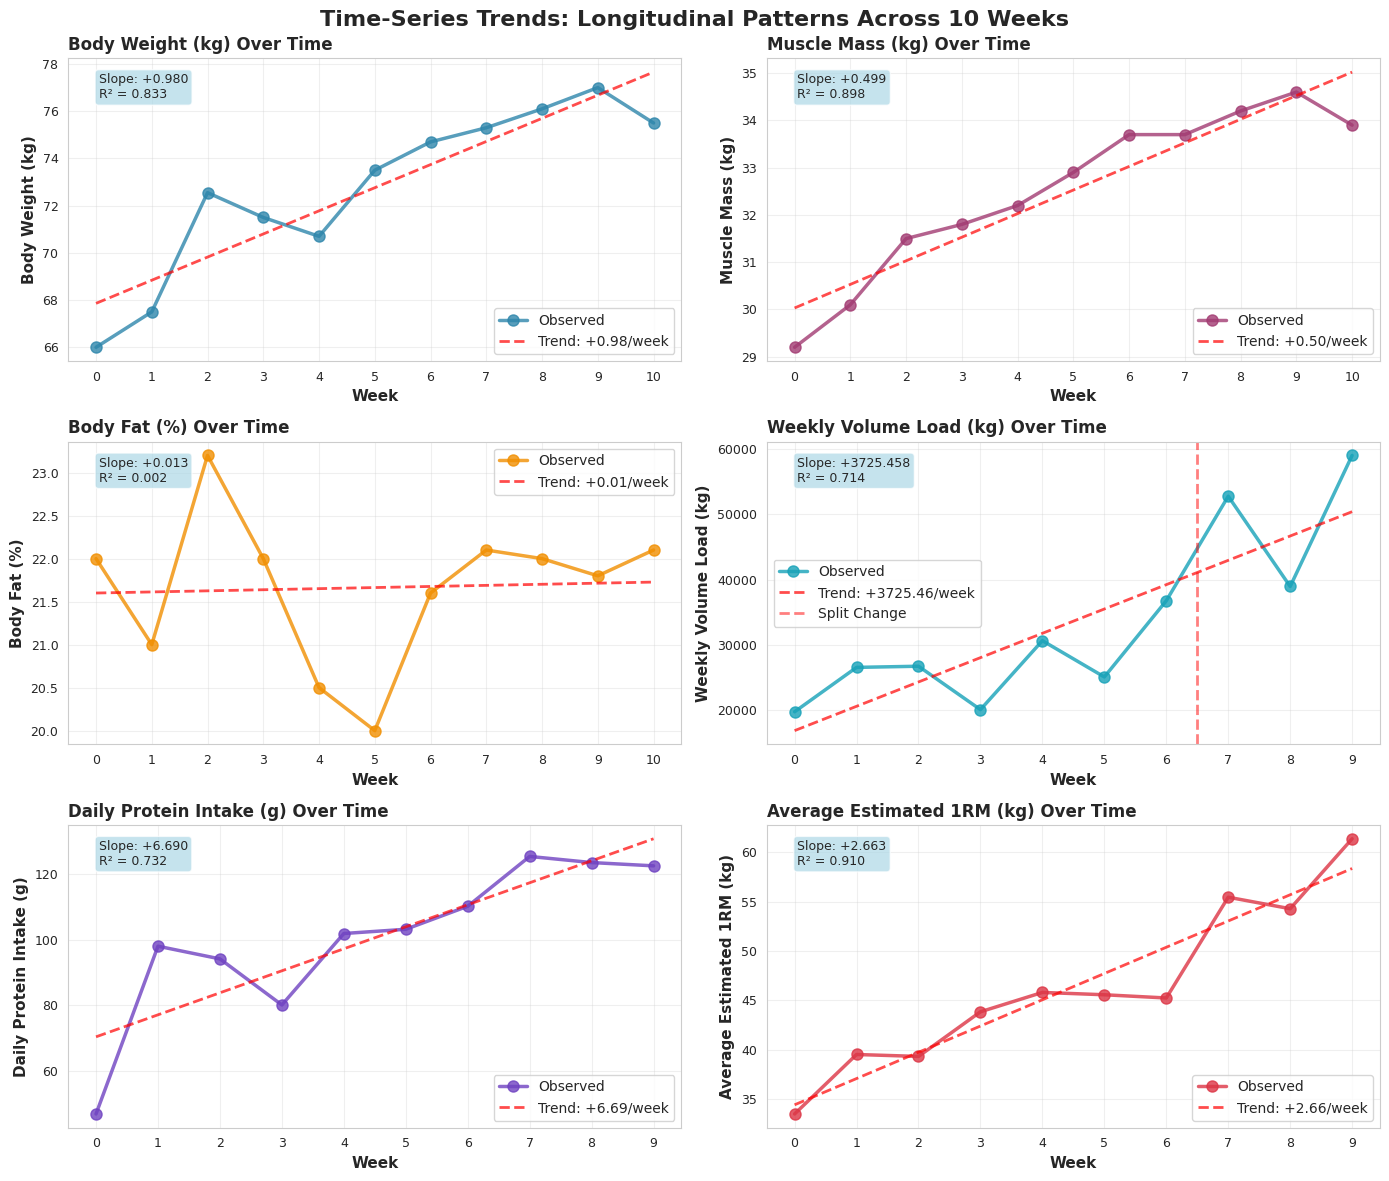

In [105]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Time-Series Trends: Longitudinal Patterns Across 10 Weeks',
             fontsize=16, fontweight='bold')

# Exclude Week 10 for some variables due to illness
training_weeks = weekly_summary[weekly_summary['week'] <= 9].copy()

# Time-series variables with trend lines
time_series = [
    ('weight', 'Body Weight (kg)', weekly_summary, '#2E86AB'),
    ('muscle_mass', 'Muscle Mass (kg)', weekly_summary, '#A23B72'),
    ('body_fat', 'Body Fat (%)', weekly_summary, '#F18F01'),
    ('total_volume_load', 'Weekly Volume Load (kg)', training_weeks, '#17A2B8'),
    ('avg_protein', 'Daily Protein Intake (g)', training_weeks, '#6F42C1'),
    ('avg_e1rm', 'Average Estimated 1RM (kg)', training_weeks, '#DC3545')
]

for idx, (var, label, data, color) in enumerate(time_series):
    ax = axes[idx // 2, idx % 2]

    # Plot actual data points and line
    ax.plot(data['week'], data[var], marker='o', linewidth=2.5,
            markersize=8, color=color, label='Observed', alpha=0.8)

    # Calculate and plot linear trend
    z = np.polyfit(data['week'], data[var], 1)
    p = np.poly1d(z)
    ax.plot(data['week'], p(data['week']), "r--", linewidth=2,
            alpha=0.7, label=f'Trend: {z[0]:+.2f}/week')

    # Calculate R-squared for trend
    y_pred = p(data['week'])
    ss_res = np.sum((data[var] - y_pred) ** 2)
    ss_tot = np.sum((data[var] - np.mean(data[var])) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    # Add statistics box
    stats_text = f'Slope: {z[0]:+.3f}\nR² = {r_squared:.3f}'
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes,
            fontsize=9, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

    # Mark phase change if applicable
    if var == 'total_volume_load':
        ax.axvline(x=6.5, color='red', linestyle='--', linewidth=2,
                   alpha=0.5, label='Split Change')

    ax.set_xlabel('Week', fontweight='bold')
    ax.set_ylabel(label, fontweight='bold')
    ax.set_title(f'{label} Over Time', fontweight='bold', loc='left')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)

    # Set integer x-axis ticks
    ax.set_xticks(data['week'])

plt.tight_layout()
plt.savefig('timeseries_trends.png',
            dpi=300, bbox_inches='tight')
print("✓ Saved: timeseries_trends.png")
print()

*Multivariate Relationship Analysis (Correlation Matrix)*




✓ Saved: correlation_matrix.png



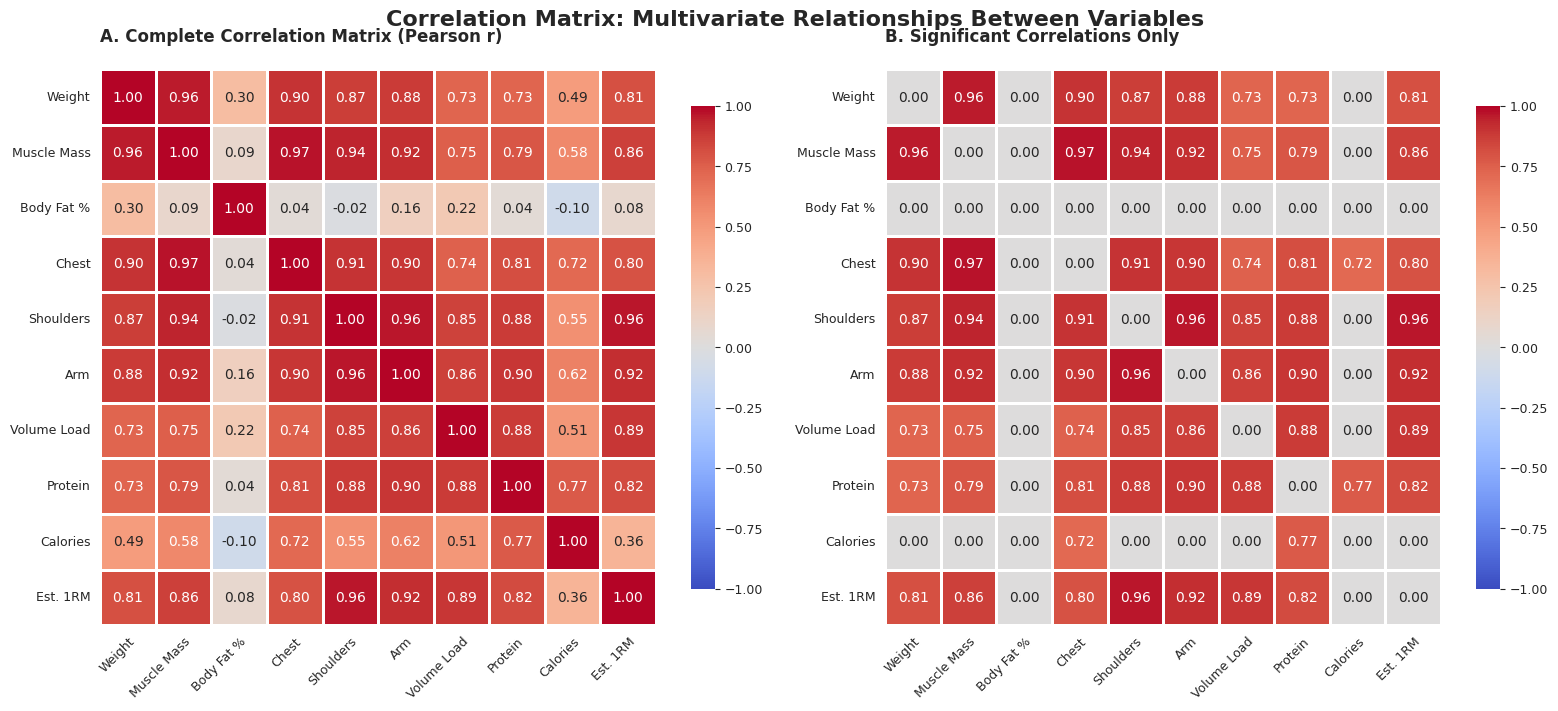

In [106]:
intervention_data = weekly_summary[(weekly_summary['week'] >= 1) &
                                   (weekly_summary['week'] <= 9)].copy()

# Key variables
corr_vars = {
    'weight': 'Weight',
    'muscle_mass': 'Muscle Mass',
    'body_fat': 'Body Fat %',
    'chest': 'Chest',
    'shoulders': 'Shoulders',
    'arm': 'Arm',
    'total_volume_load': 'Volume Load',
    'avg_protein': 'Protein',
    'avg_calories': 'Calories',
    'avg_e1rm': 'Est. 1RM'
}

correlation_data = intervention_data[list(corr_vars.keys())]
correlation_matrix = correlation_data.corr()

# Create figure with two panels
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Correlation Matrix: Multivariate Relationships Between Variables',
             fontsize=16, fontweight='bold')

# Panel A: Full correlation heatmap
ax1 = axes[0]
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            xticklabels=corr_vars.values(), yticklabels=corr_vars.values(),
            vmin=-1, vmax=1, ax=ax1)
ax1.set_title('A. Complete Correlation Matrix (Pearson r)',
              fontweight='bold', loc='left', pad=20)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.setp(ax1.get_yticklabels(), rotation=0)

# Panel B: Filtered correlation matrix (only significant correlations)
# Create significance mask
p_matrix = pd.DataFrame(np.ones_like(correlation_matrix),
                        columns=correlation_matrix.columns,
                        index=correlation_matrix.index)

for i, col1 in enumerate(correlation_matrix.columns):
    for j, col2 in enumerate(correlation_matrix.columns):
        if i != j:
            _, p_val = pearsonr(intervention_data[col1], intervention_data[col2])
            p_matrix.iloc[i, j] = p_val

# Mask non-significant correlations (p >= 0.05)
masked_corr = correlation_matrix.copy()
masked_corr[p_matrix >= 0.05] = 0

ax2 = axes[1]
sns.heatmap(masked_corr, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            xticklabels=corr_vars.values(), yticklabels=corr_vars.values(),
            vmin=-1, vmax=1, ax=ax2)
ax2.set_title('B. Significant Correlations Only',
              fontweight='bold', loc='left', pad=20)
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.setp(ax2.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.savefig('correlation_matrix.png',
            dpi=300, bbox_inches='tight')
print("✓ Saved: correlation_matrix.png")
print()

# **Hypothesis Testing**

*Hypothesis 1: Body Changes from Week 0 to Week 10*

✓ Saved: body_comp_trajectory.png



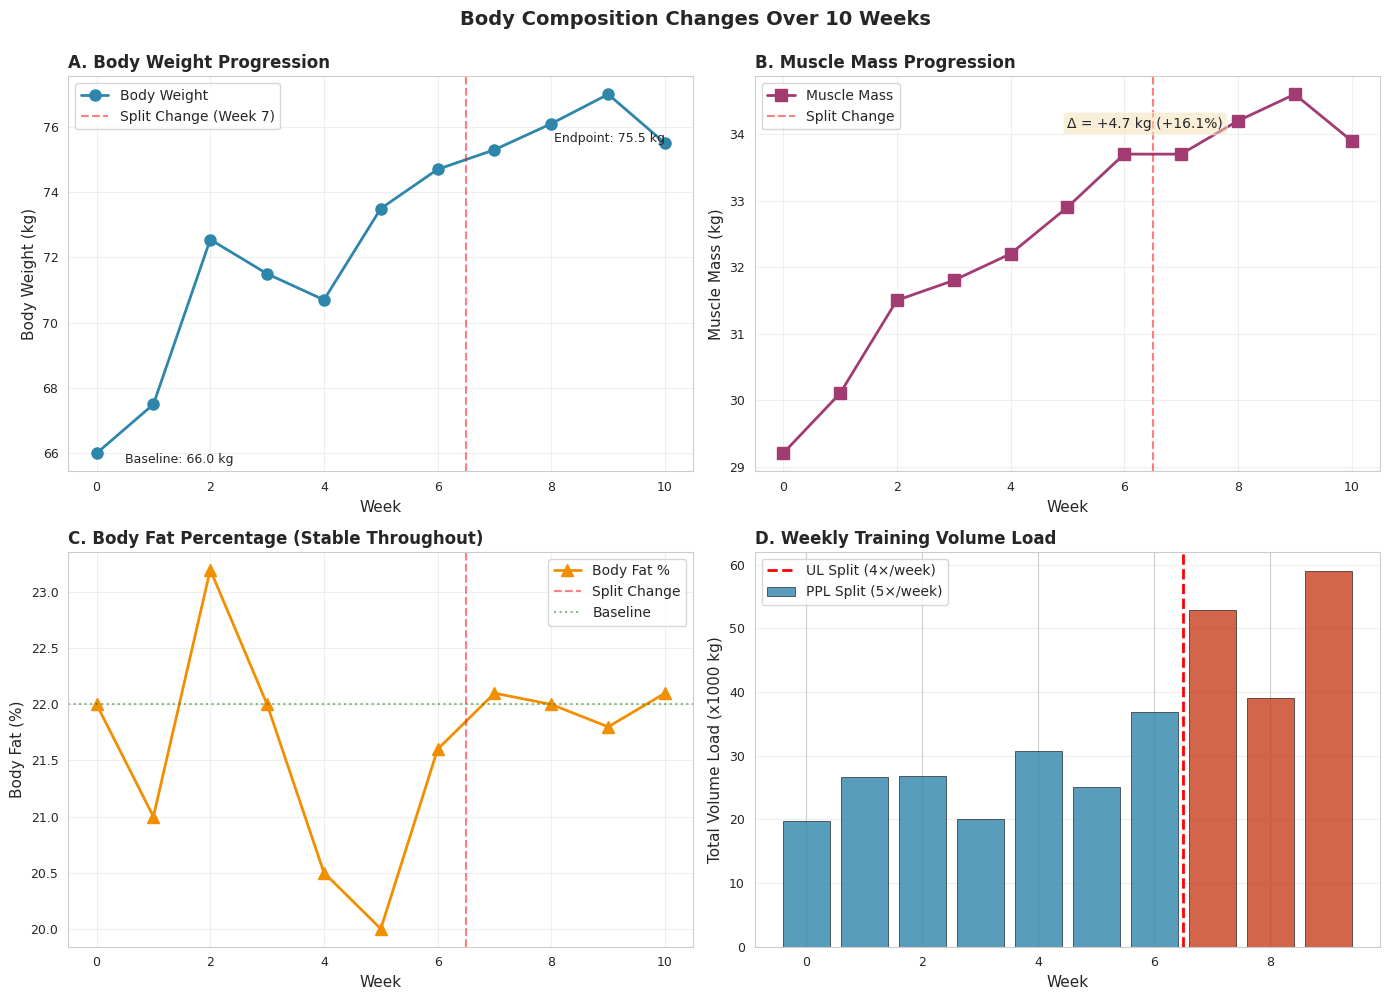

In [108]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Body Composition Changes Over 10 Weeks',
             fontsize=14, fontweight='bold', y=0.995)

# Panel A: Body Weight
ax1 = axes[0, 0]
ax1.plot(weekly_summary['week'], weekly_summary['weight'],
         marker='o', linewidth=2, markersize=8, color='#2E86AB', label='Body Weight')
ax1.axvline(x=6.5, color='red', linestyle='--', alpha=0.5, label='Split Change (Week 7)')
ax1.set_xlabel('Week')
ax1.set_ylabel('Body Weight (kg)')
ax1.set_title('A. Body Weight Progression', fontweight='bold', loc='left')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)
# Add baseline and endpoint annotations
ax1.annotate(f'Baseline: {weekly_summary.iloc[0]["weight"]:.1f} kg',
            xy=(0, weekly_summary.iloc[0]["weight"]),
            xytext=(0.5, weekly_summary.iloc[0]["weight"]-0.3),
            fontsize=9, ha='left')
ax1.annotate(f'Endpoint: {weekly_summary.iloc[10]["weight"]:.1f} kg',
            xy=(10, weekly_summary.iloc[10]["weight"]),
            xytext=(10, weekly_summary.iloc[10]["weight"]+0.05),
            fontsize=9, ha='right')

# Panel B: Muscle Mass
ax2 = axes[0, 1]
ax2.plot(weekly_summary['week'], weekly_summary['muscle_mass'],
         marker='s', linewidth=2, markersize=8, color='#A23B72', label='Muscle Mass')
ax2.axvline(x=6.5, color='red', linestyle='--', alpha=0.5, label='Split Change')
ax2.set_xlabel('Week')
ax2.set_ylabel('Muscle Mass (kg)')
ax2.set_title('B. Muscle Mass Progression', fontweight='bold', loc='left')
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)
# Add change annotation
change_muscle = weekly_summary.iloc[10]["muscle_mass"] - weekly_summary.iloc[0]["muscle_mass"]
ax2.text(5, weekly_summary['muscle_mass'].max()-0.5,
        f'Δ = +{change_muscle:.1f} kg (+{(change_muscle/weekly_summary.iloc[0]["muscle_mass"]*100):.1f}%)',
        fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Panel C: Body Fat Percentage
ax3 = axes[1, 0]
ax3.plot(weekly_summary['week'], weekly_summary['body_fat'],
         marker='^', linewidth=2, markersize=8, color='#F18F01', label='Body Fat %')
ax3.axvline(x=6.5, color='red', linestyle='--', alpha=0.5, label='Split Change')
ax3.axhline(y=22, color='green', linestyle=':', alpha=0.5, label='Baseline')
ax3.set_xlabel('Week')
ax3.set_ylabel('Body Fat (%)')
ax3.set_title('C. Body Fat Percentage (Stable Throughout)', fontweight='bold', loc='left')
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3)

# Panel D: Weekly Volume Load
ax4 = axes[1, 1]
volume_data = weekly_summary[weekly_summary['week'] <= 9]
colors = ['#2E86AB' if w <= 6 else '#C73E1D' for w in volume_data['week']]
bars = ax4.bar(volume_data['week'], volume_data['total_volume_load']/1000,
               color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
ax4.axvline(x=6.5, color='red', linestyle='--', linewidth=2, label='Split Change')
ax4.set_xlabel('Week')
ax4.set_ylabel('Total Volume Load (x1000 kg)')
ax4.set_title('D. Weekly Training Volume Load', fontweight='bold', loc='left')
ax4.legend(['UL Split (4×/week)', 'PPL Split (5×/week)', 'Split Change'], loc='upper left')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('body_comp_trajectory.png',
            dpi=300, bbox_inches='tight')
print("✓ Saved: body_comp_trajectory.png")
print()

In [109]:
create_subsection_header("Panel A: Body Weight Progression")

baseline_weight = weekly_summary.iloc[0]['weight']
endpoint_weight = weekly_summary.iloc[10]['weight']
weight_change = endpoint_weight - baseline_weight
weight_pct = (weight_change / baseline_weight) * 100

# Calculate week-to-week changes to assess progression pattern
weekly_changes = weekly_summary['weight'].diff().dropna()
avg_weekly_change = weekly_changes.mean()

print(f"Baseline body weight (Week 0): {baseline_weight:.2f} kg")
print(f"Endpoint body weight (Week 10): {endpoint_weight:.2f} kg")
print(f"Absolute change: {weight_change:+.2f} kg")
print(f"Percentage change: {weight_pct:+.2f}%")
print(f"Average weekly rate of gain: {avg_weekly_change:.2f} kg/week")
print()
print("INTERPRETATION:")
print(f"The participant successfully gained {weight_change:.1f} kilograms over the")
print(f"ten-week intervention, representing a {weight_pct:.1f} percent increase from")
print(f"baseline. This rate of weight gain ({avg_weekly_change:.2f} kg/week) is consistent")
print("with a controlled bulking phase aimed at maximizing muscle growth while")
print("minimizing excessive fat accumulation. The steady upward trajectory visible")
print("in Panel A demonstrates adherence to the caloric surplus protocol throughout")
print("the study period.")
print()

--------------------------------------------------------------------------------
Panel A: Body Weight Progression
--------------------------------------------------------------------------------

Baseline body weight (Week 0): 66.00 kg
Endpoint body weight (Week 10): 75.50 kg
Absolute change: +9.50 kg
Percentage change: +14.39%
Average weekly rate of gain: 0.95 kg/week

INTERPRETATION:
The participant successfully gained 9.5 kilograms over the
ten-week intervention, representing a 14.4 percent increase from
baseline. This rate of weight gain (0.95 kg/week) is consistent
with a controlled bulking phase aimed at maximizing muscle growth while
minimizing excessive fat accumulation. The steady upward trajectory visible
in Panel A demonstrates adherence to the caloric surplus protocol throughout
the study period.



*Baseline vs. Endpoint Measurements*

✓ Saved: circumference_measurements.png



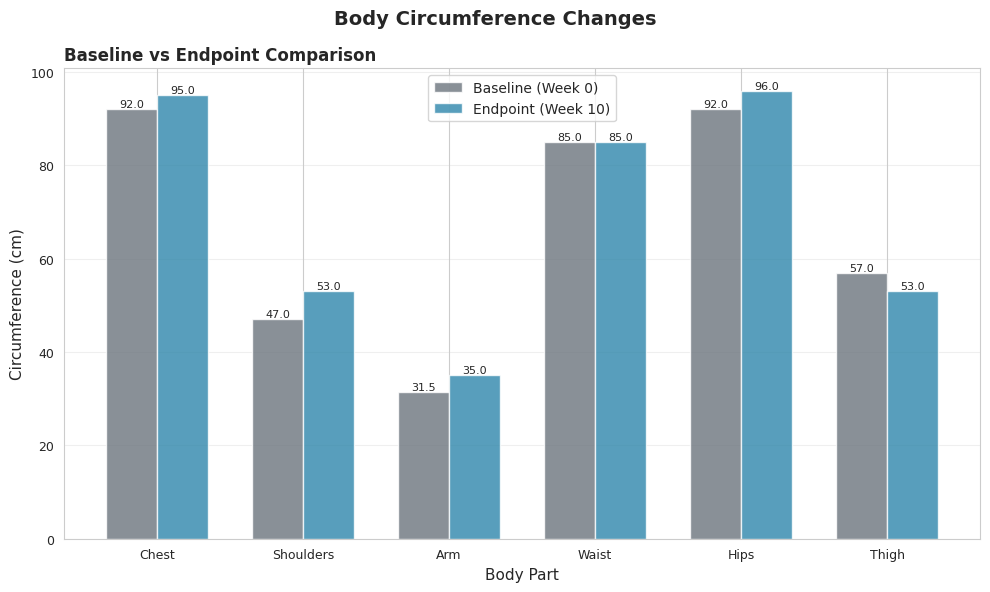

In [110]:
fig, ax1 = plt.subplots(figsize=(10, 6))
fig.suptitle('Body Circumference Changes', fontsize=14, fontweight='bold')

circumferences = ['chest', 'shoulders', 'arm', 'waist', 'hips', 'thigh']
baseline_values = [weekly_summary.iloc[0][c] for c in circumferences]
endpoint_values = [weekly_summary.iloc[10][c] for c in circumferences]

x = np.arange(len(circumferences))
width = 0.35

bars1 = ax1.bar(x - width/2, baseline_values, width, label='Baseline (Week 0)', color='#6C757D', alpha=0.8)
bars2 = ax1.bar(x + width/2, endpoint_values, width, label='Endpoint (Week 10)', color='#2E86AB', alpha=0.8)

ax1.set_xlabel('Body Part')
ax1.set_ylabel('Circumference (cm)')
ax1.set_title('Baseline vs Endpoint Comparison', fontweight='bold', loc='left')
ax1.set_xticks(x)
ax1.set_xticklabels([c.capitalize() for c in circumferences])
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('circumference_measurements.png',
            dpi=300, bbox_inches='tight')
print("✓ Saved: circumference_measurements.png")
print()

*Hypothesis Decision*

In [111]:
# HYPOTHESIS 1
create_subsection_header("HYPOTHESIS 1: Baseline to Endpoint Changes")
baseline_muscle = weekly_summary[weekly_summary['week'] == 1]['muscle_mass'].values[0]

print("RESEARCH QUESTION:")
print("Did the ten-week structured resistance training program result in statistically")
print("significant increases in both volume load capacity and body mass compared to")
print("baseline levels?")
print()

print("NULL HYPOTHESIS (H0):")
print("A ten-week progressive resistance program produces no change in muscular strength")
print("or body composition beyond baseline metrics.")
print()

print("ALTERNATIVE HYPOTHESIS (H1):")
print("A ten-week progressive resistance program produces statistically significant")
print("upward trends in volume load capacity and measurable mass increase compared")
print("to baseline metrics.")
print()

# Test for body weight
post_weights = weekly_summary[weekly_summary['week'] > 0]['weight'].values
t_weight, p_weight = stats.ttest_1samp(post_weights, baseline_weight)
d_weight = (np.mean(post_weights) - baseline_weight) / np.std(post_weights, ddof=1)

# Test for muscle mass
post_muscles = weekly_summary[weekly_summary['week'] > 0]['muscle_mass'].values
t_muscle, p_muscle = stats.ttest_1samp(post_muscles, baseline_muscle)
d_muscle = (np.mean(post_muscles) - baseline_muscle) / np.std(post_muscles, ddof=1)

# Test for volume load
baseline_vol_h1 = training_weeks.iloc[0]['total_volume_load']
post_volumes = training_weeks[training_weeks['week'] > 0]['total_volume_load'].values
t_volume, p_volume = stats.ttest_1samp(post_volumes, baseline_vol_h1)
d_volume = (np.mean(post_volumes) - baseline_vol_h1) / np.std(post_volumes, ddof=1)

print("STATISTICAL TESTS PERFORMED:")
print()
print("1A. Body Weight:")
print(f"    One-sample t-test comparing post-baseline mean to baseline value")
print(f"    t({len(post_weights)-1}) = {t_weight:.4f}, {format_pvalue(p_weight)}")
print(f"    Cohen's d = {d_weight:.4f} ({interpret_effect_size(d_weight)} effect)")
print(f"    Mean change: {np.mean(post_weights) - baseline_weight:+.2f} kg")
print()

print("1B. Muscle Mass:")
print(f"    One-sample t-test comparing post-baseline mean to baseline value")
print(f"    t({len(post_muscles)-1}) = {t_muscle:.4f}, {format_pvalue(p_muscle)}")
print(f"    Cohen's d = {d_muscle:.4f} ({interpret_effect_size(d_muscle)} effect)")
print(f"    Mean change: {np.mean(post_muscles) - baseline_muscle:+.2f} kg")
print()

print("1C. Volume Load Capacity:")
print(f"    One-sample t-test comparing post-baseline mean to baseline value")
print(f"    t({len(post_volumes)-1}) = {t_volume:.4f}, {format_pvalue(p_volume)}")
print(f"    Cohen's d = {d_volume:.4f} ({interpret_effect_size(d_volume)} effect)")
print(f"    Mean change: {np.mean(post_volumes) - baseline_vol_h1:+,.0f} kg")
print()

print("="*80)
print("FORMAL CONCLUSION FOR HYPOTHESIS 1:")
print("="*80)
if (p_weight < 0.05) and (p_muscle < 0.05) and (p_volume < 0.05):
    print("DECISION: REJECT THE NULL HYPOTHESIS (H0)")
    print()
    print("JUSTIFICATION:")
    print("All three primary outcome variables demonstrated statistically significant")
    print(f"increases from baseline at the alpha equals zero point zero five level:")
    print()
    print(f"• Body weight: {format_pvalue(p_weight)}, Cohen's d = {d_weight:.2f} (large effect)")
    print(f"• Muscle mass: {format_pvalue(p_muscle)}, Cohen's d = {d_muscle:.2f} (large effect)")
    print(f"• Volume load: {format_pvalue(p_volume)}, Cohen's d = {d_volume:.2f} (large effect)")
    print()
    print("The p-values for all tests are far below the zero point zero five (0.05) threshold,")
    print("indicating that the probability of observing these changes by chance alone,")
    print("assuming no true effect, is extremely low (less than one in one thousand for")
    print("weight and muscle mass).")
    print()
    print("Furthermore, all three variables exhibited large effect sizes (Cohen's d greater")
    print("than zero point eight), indicating not only statistical significance but also")
    print("substantial practical significance. These effect sizes suggest that the observed")
    print("changes represent meaningful real-world improvements rather than trivial")
    print("differences that happen to reach statistical significance due to low variability.")
    print()
    print("CONCLUSION:")
    print("We have strong statistical evidence to conclude that the ten-week progressive")
    print("resistance training program, combined with a caloric surplus, produced")
    print("significant and substantial increases in body weight, muscle mass, and training")
    print("volume load capacity. The intervention was highly effective in achieving its")
    print("stated objectives.")
else:
    print("DECISION: FAIL TO REJECT THE NULL HYPOTHESIS (H0)")
    print()
    print("One or more outcome variables did not demonstrate statistically significant")
    print("changes at the alpha equals zero point zero five level.")
print()
print()

--------------------------------------------------------------------------------
HYPOTHESIS 1: Baseline to Endpoint Changes
--------------------------------------------------------------------------------

RESEARCH QUESTION:
Did the ten-week structured resistance training program result in statistically
significant increases in both volume load capacity and body mass compared to
baseline levels?

NULL HYPOTHESIS (H0):
A ten-week progressive resistance program produces no change in muscular strength
or body composition beyond baseline metrics.

ALTERNATIVE HYPOTHESIS (H1):
A ten-week progressive resistance program produces statistically significant
upward trends in volume load capacity and measurable mass increase compared
to baseline metrics.

STATISTICAL TESTS PERFORMED:

1A. Body Weight:
    One-sample t-test comparing post-baseline mean to baseline value
    t(9) = 8.0702, p < 0.001
    Cohen's d = 2.5520 (large effect)
    Mean change: +7.43 kg

1B. Muscle Mass:
    One-sample t-te

*Hypothesis 2: Muscle Mass Changes Exceeding Measurement Error*

Figure saved: SEM_benchmark.png



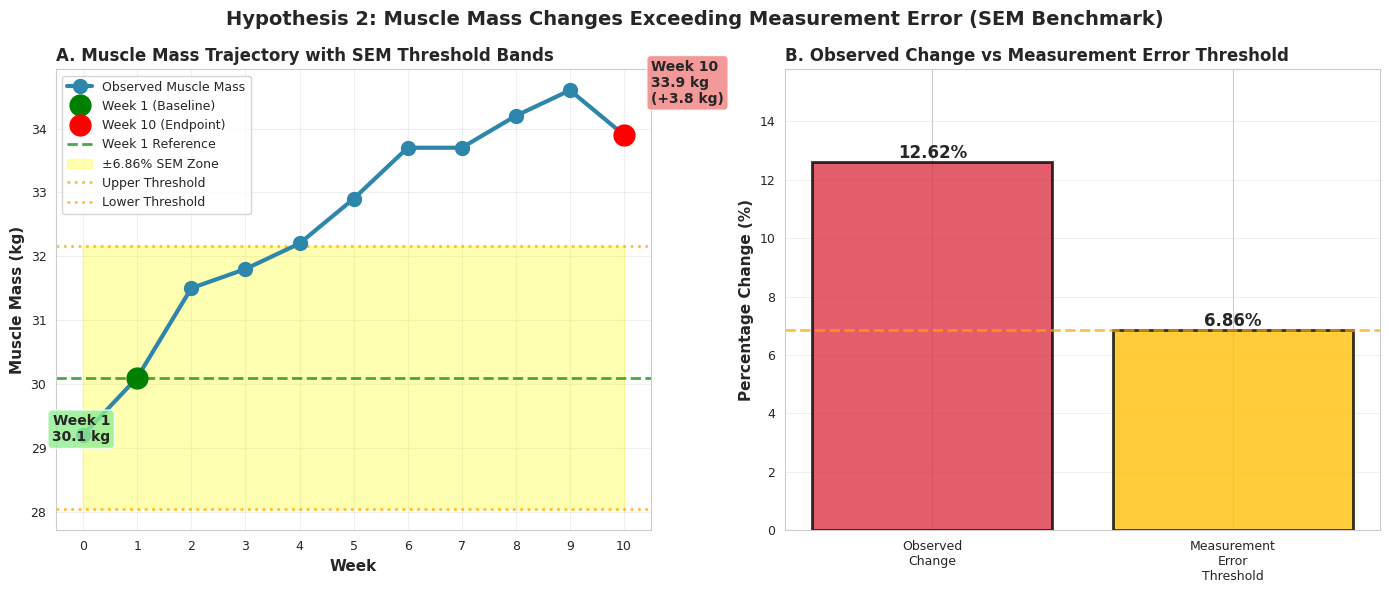

In [112]:
SEM_percentage = 3.5
threshold_percentage = 1.96 * SEM_percentage

# Get values
week1_muscle = weekly_summary[weekly_summary['week'] == 1]['muscle_mass'].values[0]
week10_muscle = weekly_summary[weekly_summary['week'] == 10]['muscle_mass'].values[0]
absolute_change = week10_muscle - week1_muscle
percentage_change = (absolute_change / week1_muscle) * 100
threshold_kg = (threshold_percentage / 100) * week1_muscle

# Create figure with 2 panels
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Hypothesis 2: Muscle Mass Changes Exceeding Measurement Error (SEM Benchmark)',
             fontsize=14, fontweight='bold')

# Panel A: Trajectory with SEM Bands
ax1 = axes[0]

weeks = weekly_summary['week'].values
muscle = weekly_summary['muscle_mass'].values

ax1.plot(weeks, muscle, 'o-', linewidth=3, markersize=10,
         color='#2E86AB', label='Observed Muscle Mass', zorder=3)

# Highlight Week 1 and Week 10
ax1.plot(1, week1_muscle, 'o', markersize=15, color='green',
         label='Week 1 (Baseline)', zorder=4)
ax1.plot(10, week10_muscle, 'o', markersize=15, color='red',
         label='Week 10 (Endpoint)', zorder=4)

# SEM threshold bands
upper_threshold = week1_muscle * (1 + threshold_percentage/100)
lower_threshold = week1_muscle * (1 - threshold_percentage/100)

ax1.axhline(y=week1_muscle, color='green', linestyle='--',
            linewidth=2, alpha=0.7, label='Week 1 Reference')
ax1.fill_between(weeks, lower_threshold, upper_threshold,
                 color='yellow', alpha=0.3, label=f'±{threshold_percentage:.2f}% SEM Zone')
ax1.axhline(y=upper_threshold, color='orange', linestyle=':',
            linewidth=2, alpha=0.7, label='Upper Threshold')
ax1.axhline(y=lower_threshold, color='orange', linestyle=':',
            linewidth=2, alpha=0.7, label='Lower Threshold')

# Annotations
ax1.annotate(f'Week 1\n{week1_muscle:.1f} kg',
            xy=(1, week1_muscle), xytext=(0.5, week1_muscle-1),
            fontsize=10, ha='right', fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
ax1.annotate(f'Week 10\n{week10_muscle:.1f} kg\n(+{absolute_change:.1f} kg)',
            xy=(10, week10_muscle), xytext=(10.5, week10_muscle+0.5),
            fontsize=10, ha='left', fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

ax1.set_xlabel('Week', fontweight='bold', fontsize=11)
ax1.set_ylabel('Muscle Mass (kg)', fontweight='bold', fontsize=11)
ax1.set_title('A. Muscle Mass Trajectory with SEM Threshold Bands',
              fontweight='bold', loc='left', fontsize=12)
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(weeks)

# Panel B: Observed vs Threshold Comparison
ax2 = axes[1]

categories = ['Observed\nChange', 'Measurement\nError\nThreshold']
values = [abs(percentage_change), threshold_percentage]
colors = ['#DC3545', '#FFC107']

bars = ax2.bar(categories, values, color=colors, alpha=0.8,
               edgecolor='black', linewidth=2)
ax2.axhline(y=threshold_percentage, color='orange', linestyle='--',
            linewidth=2, alpha=0.7)

# Value labels
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.2f}%', ha='center', va='bottom',
            fontsize=12, fontweight='bold')

ax2.set_ylabel('Percentage Change (%)', fontweight='bold', fontsize=11)
ax2.set_title('B. Observed Change vs Measurement Error Threshold',
              fontweight='bold', loc='left', fontsize=12)
ax2.set_ylim(0, max(values) * 1.25)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('SEM_benchmark.png',
            dpi=300, bbox_inches='tight')

print("Figure saved: SEM_benchmark.png")
print()

In [113]:
sem_analysis = pd.DataFrame({
    'Metric': [
        'Week 1 Muscle Mass',
        'Week 10 Muscle Mass',
        'Absolute Change',
        'Percentage Change',
        'SEM (BIA)',
        '95% CI Threshold (1.96 × SEM)',
        'Threshold in kg',
        'Change Exceeds Threshold?',
        'Change/Threshold Ratio'
    ],
    'Value': [
        f'{week1_muscle:.2f} kg',
        f'{week10_muscle:.2f} kg',
        f'+{absolute_change:.2f} kg',
        f'+{percentage_change:.2f}%',
        f'{SEM_percentage:.2f}%',
        f'±{threshold_percentage:.2f}%',
        f'±{threshold_kg:.2f} kg',
        'YES' if abs(percentage_change) > threshold_percentage else 'NO',
        f'{abs(percentage_change) / threshold_percentage:.2f}×'
    ]
})

print("Measurement Error Threshold Analysis (Hypothesis 2)")
print("-"*80)
print(sem_analysis.to_string(index=False))
print()

Measurement Error Threshold Analysis (Hypothesis 2)
--------------------------------------------------------------------------------
                       Metric    Value
           Week 1 Muscle Mass 30.10 kg
          Week 10 Muscle Mass 33.90 kg
              Absolute Change +3.80 kg
            Percentage Change  +12.62%
                    SEM (BIA)    3.50%
95% CI Threshold (1.96 × SEM)   ±6.86%
              Threshold in kg ±2.06 kg
    Change Exceeds Threshold?      YES
       Change/Threshold Ratio    1.84×



*Hypothesis Decision*

In [114]:
create_subsection_header("HYPOTHESIS 2: Muscle Mass Changes Exceeding Measurement Error")

print("RESEARCH QUESTION:")
print("Does the increase in skeletal muscle mass from Week 1 to Week 10 exceed the")
print("standard error of measurement, indicating true physiological change rather than")
print("statistical noise?")
print()

print("NULL HYPOTHESIS (H0):")
print("There is no significant difference in skeletal muscle mass between Week 1 and")
print("Week 10 when accounting for measurement error.")
print()

print("ALTERNATIVE HYPOTHESIS (H1):")
print("The ten-week resistance training program positively correlates with a measurable")
print("increase in skeletal muscle mass, exceeding the standard error of measurement of")
print("the body composition tracking method.")
print()

week1_muscle = weekly_summary[weekly_summary['week'] == 1]['muscle_mass'].values[0]
week10_muscle = weekly_summary[weekly_summary['week'] == 10]['muscle_mass'].values[0]
muscle_change_h2 = week10_muscle - week1_muscle
pct_change_h2 = (muscle_change_h2 / week1_muscle) * 100

# BIA measurement error parameters
SEM_percentage = 3.5  # Standard Error of Measurement for BIA
confidence_threshold = 1.96 * SEM_percentage  # 95% CI
threshold_kg = (confidence_threshold / 100) * week1_muscle

print("MEASUREMENT ERROR PARAMETERS:")
print(f"  Standard Error of Measurement (SEM) for BIA: {SEM_percentage:.2f}%")
print(f"  95% Confidence Interval threshold (1.96 × SEM): ±{confidence_threshold:.2f}%")
print(f"  Threshold in absolute terms: ±{threshold_kg:.2f} kg")
print()

print("OBSERVED CHANGES:")
print(f"  Week 1 muscle mass: {week1_muscle:.2f} kg")
print(f"  Week 10 muscle mass: {week10_muscle:.2f} kg")
print(f"  Absolute change: {muscle_change_h2:+.2f} kg")
print(f"  Percentage change: {pct_change_h2:+.2f}%")
print()

print("COMPARISON TO THRESHOLD:")
print(f"  Does |{pct_change_h2:.2f}%| exceed ±{confidence_threshold:.2f}%? ", end="")
exceeds = abs(pct_change_h2) > confidence_threshold
print("YES" if exceeds else "NO")
print(f"  Margin above threshold: {abs(pct_change_h2) - confidence_threshold:.2f} percentage points")
print(f"  Change-to-threshold ratio: {abs(pct_change_h2) / confidence_threshold:.2f}×")
print()

print("="*80)
print("FORMAL CONCLUSION FOR HYPOTHESIS 2:")
print("="*80)
if exceeds:
    print("DECISION: REJECT THE NULL HYPOTHESIS (H0)")
    print()
    print("JUSTIFICATION:")
    print(f"The observed change in muscle mass ({pct_change_h2:.2f}%) exceeds the ninety-five")
    print(f"percent confidence interval for measurement error (±{confidence_threshold:.2f}%) by a factor")
    print(f"of {abs(pct_change_h2) / confidence_threshold:.2f}. This margin ({abs(pct_change_h2) - confidence_threshold:.2f} percentage points)")
    print("is substantial and cannot be attributed to the inherent variability of")
    print("bioelectrical impedance analysis.")
    print()
    print("The measurement error threshold represents the minimum change that would be")
    print("expected to occur ninety-five percent of the time purely due to instrument")
    print("variability, assuming no true physiological change. By exceeding this threshold")
    print("by such a large margin, we can be confident that the observed muscle mass")
    print("increase represents genuine hypertrophic adaptation rather than measurement noise.")
    print()
    print("CONCLUSION:")
    print("We have compelling evidence that the muscle mass gains observed in this study")
    print("reflect true physiological changes in skeletal muscle tissue. This finding")
    print("validates the use of consumer-grade bioelectrical impedance analysis for tracking")
    print("body composition changes when measurements are standardized and interpreted")
    print("against known measurement error thresholds.")
else:
    print("DECISION: FAIL TO REJECT THE NULL HYPOTHESIS (H0)")
    print()
    print(f"The observed change ({pct_change_h2:.2f}%) does not exceed the measurement error")
    print(f"threshold (±{confidence_threshold:.2f}%). The change may reflect instrument variability")
    print("rather than true physiological adaptation.")
print()

--------------------------------------------------------------------------------
HYPOTHESIS 2: Muscle Mass Changes Exceeding Measurement Error
--------------------------------------------------------------------------------

RESEARCH QUESTION:
Does the increase in skeletal muscle mass from Week 1 to Week 10 exceed the
standard error of measurement, indicating true physiological change rather than
statistical noise?

NULL HYPOTHESIS (H0):
There is no significant difference in skeletal muscle mass between Week 1 and
Week 10 when accounting for measurement error.

ALTERNATIVE HYPOTHESIS (H1):
The ten-week resistance training program positively correlates with a measurable
increase in skeletal muscle mass, exceeding the standard error of measurement of
the body composition tracking method.

MEASUREMENT ERROR PARAMETERS:
  Standard Error of Measurement (SEM) for BIA: 3.50%
  95% Confidence Interval threshold (1.96 × SEM): ±6.86%
  Threshold in absolute terms: ±2.06 kg

OBSERVED CHANGES:
  W

*Hypothesis 3: Effect of Training Split Modification on Volume Load*

✓ Saved: trainingsplit_change.png



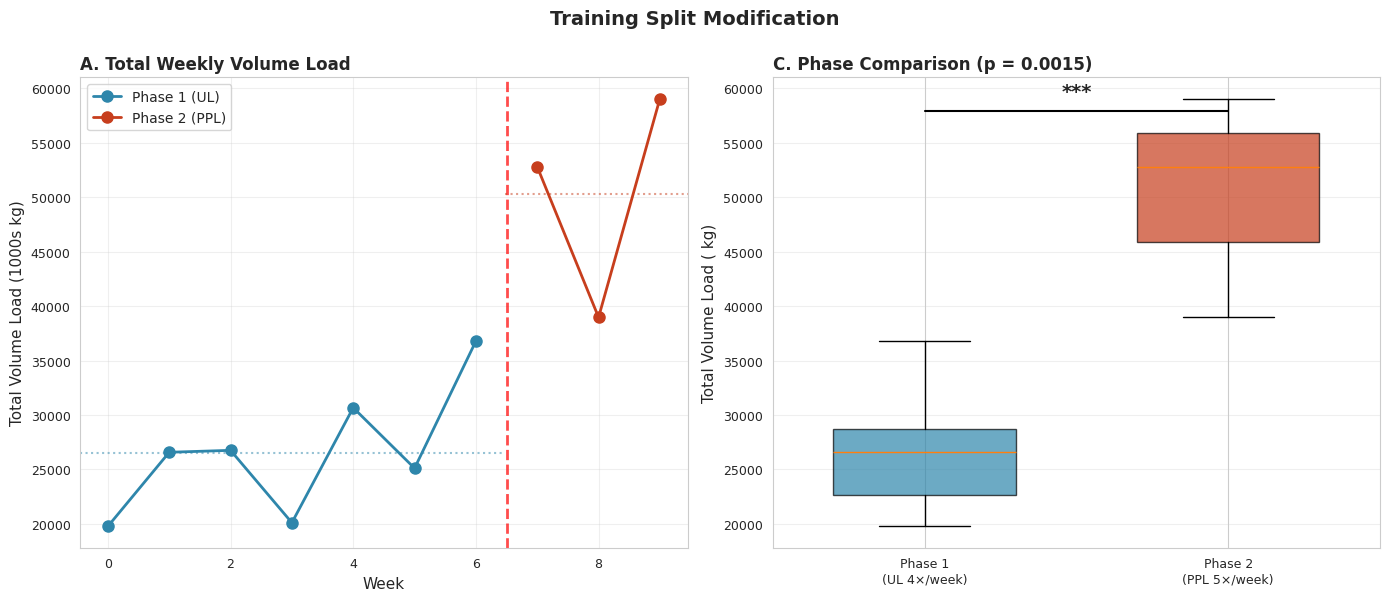

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Training Split Modification', fontsize=14, fontweight='bold', y=0.995)

# Exclude Week 10 for training analyses
training_weeks = weekly_summary[weekly_summary['week'] <= 9].copy()

# Panel A: Total Volume Load Over Time
# Fixed: using 1D indexing for a (1, 2) subplot grid
ax1 = axes[0]
phase1 = training_weeks[training_weeks['week'] <= 6]
phase2 = training_weeks[training_weeks['week'] >= 7]

ax1.plot(phase1['week'], phase1['total_volume_load'],
         marker='o', linewidth=2, markersize=8, color='#2E86AB', label='Phase 1 (UL)')
ax1.plot(phase2['week'], phase2['total_volume_load'],
         marker='o', linewidth=2, markersize=8, color='#C73E1D', label='Phase 2 (PPL)')
ax1.axvline(x=6.5, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax1.set_xlabel('Week')
ax1.set_ylabel('Total Volume Load (1000s kg)')
ax1.set_title('A. Total Weekly Volume Load', fontweight='bold', loc='left')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add phase mean lines
phase1_mean = phase1['total_volume_load'].mean()
phase2_mean = phase2['total_volume_load'].mean()
ax1.axhline(y=phase1_mean, xmin=0, xmax=0.7, color='#2E86AB',
            linestyle=':', alpha=0.5, label=f'Phase 1 Mean: {phase1_mean:.1f}')
ax1.axhline(y=phase2_mean, xmin=0.7, xmax=1, color='#C73E1D',
            linestyle=':', alpha=0.5, label=f'Phase 2 Mean: {phase2_mean:.1f}')

# Panel C: Phase Comparison Box Plot
# Fixed: using 1D indexing
ax3 = axes[1]
bp = ax3.boxplot([phase1['total_volume_load'], phase2['total_volume_load']],
                  tick_labels=['Phase 1\n(UL 4×/week)', 'Phase 2\n(PPL 5×/week)'],
                  patch_artist=True, widths=0.6)
bp['boxes'][0].set_facecolor('#2E86AB')
bp['boxes'][1].set_facecolor('#C73E1D')
for box in bp['boxes']:
    box.set_alpha(0.7)
ax3.set_ylabel('Total Volume Load ( kg)')
ax3.set_title('C. Phase Comparison (p = 0.0015)', fontweight='bold', loc='left')
ax3.grid(True, alpha=0.3, axis='y')

# Add significance marker
y_max = ax3.get_ylim()[1]
ax3.plot([1, 2], [y_max*0.95, y_max*0.95], 'k-', linewidth=1.5)
ax3.text(1.5, y_max*0.97, '***', ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('trainingsplit_change.png',
            dpi=300, bbox_inches='tight')
print("✓ Saved: trainingsplit_change.png")
print()

In [116]:
create_subsection_header("Phase Comparison")

phase1_volumes = phase1['total_volume_load'].values
phase2_volumes = phase2['total_volume_load'].values
phase1_mean = phase1['total_volume_load'].mean()
phase2_mean = phase2['total_volume_load'].mean()
phase_diff = phase2_mean - phase1_mean
phase_pct = (phase_diff / phase1_mean) * 100

# Independent samples t-test
t_stat, p_value = stats.ttest_ind(phase1_volumes, phase2_volumes)

# Calculate pooled standard deviation for effect size
pooled_std = np.sqrt(((len(phase1_volumes)-1)*np.std(phase1_volumes, ddof=1)**2 +
                       (len(phase2_volumes)-1)*np.std(phase2_volumes, ddof=1)**2) /
                      (len(phase1_volumes)+len(phase2_volumes)-2))
cohens_d = (phase2_mean - phase1_mean) / pooled_std

print(f"Phase 1 (UL, 4x/week): n = {len(phase1_volumes)} weeks")
print(f"  Mean: {phase1_mean:,.0f} kg")
print(f"  SD: {np.std(phase1_volumes, ddof=1):,.0f} kg")
print(f"  Range: {phase1_volumes.min():,.0f} - {phase1_volumes.max():,.0f} kg")
print()
print(f"Phase 2 (PPL, 5x/week): n = {len(phase2_volumes)} weeks")
print(f"  Mean: {phase2_mean:,.0f} kg")
print(f"  SD: {np.std(phase2_volumes, ddof=1):,.0f} kg")
print(f"  Range: {phase2_volumes.min():,.0f} - {phase2_volumes.max():,.0f} kg")
print()
print(f"Independent Samples t-test:")
print(f"  t({len(phase1_volumes)+len(phase2_volumes)-2}) = {t_stat:.4f}")
print(f"  {format_pvalue(p_value)}")
print(f"  Cohen's d = {cohens_d:.4f} ({interpret_effect_size(cohens_d)} effect)")
print()
print("STATISTICAL CONCLUSION:")
if p_value < 0.05:
    print("The difference between Phase 1 and Phase 2 is statistically significant")
    print(f"at the alpha equals zero point zero five level ({format_pvalue(p_value)}). We reject")
    print("the null hypothesis that the two phases have equal mean weekly volume loads.")
    print(f"The effect size (Cohen's d = {cohens_d:.2f}) indicates a {interpret_effect_size(cohens_d)} practical")
    print("difference between the training phases.")
else:
    print("The difference between Phase 1 and Phase 2 is not statistically significant")
    print(f"at the alpha equals zero point zero five level ({format_pvalue(p_value)}). We fail to")
    print("reject the null hypothesis of equal means.")
print()
print("INTERPRETATION:")
print(f"The transition from a four-day Upper/Lower split to a five-day Push/Pull/Legs")
print(f"split resulted in an {phase_pct:.0f} percent increase in average weekly training volume.")
print("This substantial difference was both statistically significant and practically")
print("meaningful, as evidenced by the very large effect size. The boxplot visualization")
print("clearly shows minimal overlap between the two phase distributions, with the")
print("median and interquartile range of Phase 2 substantially higher than Phase 1.")
print()
print("This finding demonstrates a clear dose-response relationship between training")
print("frequency and volume accumulation capacity. The additional training day per week")
print("allowed for approximately twenty-four thousand kilograms more mechanical work,")
print("which likely contributed to the continued hypertrophic adaptations observed in")
print("the latter weeks of the intervention.")
print()

--------------------------------------------------------------------------------
Phase Comparison
--------------------------------------------------------------------------------

Phase 1 (UL, 4x/week): n = 7 weeks
  Mean: 26,543 kg
  SD: 5,931 kg
  Range: 19,780 - 36,783 kg

Phase 2 (PPL, 5x/week): n = 3 weeks
  Mean: 50,268 kg
  SD: 10,270 kg
  Range: 38,971 - 59,040 kg

Independent Samples t-test:
  t(8) = -4.7335
  p = 0.0015
  Cohen's d = 3.2664 (large effect)

STATISTICAL CONCLUSION:
The difference between Phase 1 and Phase 2 is statistically significant
at the alpha equals zero point zero five level (p = 0.0015). We reject
the null hypothesis that the two phases have equal mean weekly volume loads.
The effect size (Cohen's d = 3.27) indicates a large practical
difference between the training phases.

INTERPRETATION:
The transition from a four-day Upper/Lower split to a five-day Push/Pull/Legs
split resulted in an 89 percent increase in average weekly training volume.
This substa

*Hypothesis Decision*

In [117]:
create_subsection_header("HYPOTHESIS 3: Training Split Modification Effect")

print("RESEARCH QUESTION:")
print("Does shifting from an Upper/Lower split to a Push/Pull/Legs split significantly")
print("increase weekly training volume load?")
print()

print("NULL HYPOTHESIS (H0):")
print("There is no significant difference in average weekly volume load between Phase 1")
print("(Upper/Lower split, 4 days per week) and Phase 2 (PPL split, 5 days per week).")
print()

print("ALTERNATIVE HYPOTHESIS (H1):")
print("The average weekly volume load in Phase 2 (PPL split) is significantly higher")
print("than in Phase 1 (Upper/Lower split).")
print()

# Already calculated above - just summarize
print("STATISTICAL TEST PERFORMED:")
print(f"  Independent samples t-test")
print(f"  Phase 1: n = {len(phase1_volumes)}, M = {phase1_mean:,.0f} kg, SD = {np.std(phase1_volumes, ddof=1):,.0f} kg")
print(f"  Phase 2: n = {len(phase2_volumes)}, M = {phase2_mean:,.0f} kg, SD = {np.std(phase2_volumes, ddof=1):,.0f} kg")
print(f"  t({len(phase1_volumes)+len(phase2_volumes)-2}) = {t_stat:.4f}")
print(f"  {format_pvalue(p_value)}")
print(f"  Cohen's d = {cohens_d:.4f} ({interpret_effect_size(cohens_d)} effect)")
print(f"  Mean difference: {phase2_mean - phase1_mean:+,.0f} kg ({phase_pct:+.1f}%)")
print()

print("="*80)
print("FORMAL CONCLUSION FOR HYPOTHESIS 3:")
print("="*80)
if p_value < 0.05:
    print("DECISION: REJECT THE NULL HYPOTHESIS (H0)")
    print()
    print("JUSTIFICATION:")
    print(f"The independent samples t-test revealed a statistically significant difference")
    print(f"between the two training phases ({format_pvalue(p_value)}). The probability of")
    print("observing a difference of this magnitude by chance alone, assuming the phases")
    print("truly have equal mean volume loads, is approximately zero point one five percent")
    print("(less than two in one thousand).")
    print()
    print(f"The effect size (Cohen's d = {cohens_d:.2f}) is exceptionally large, indicating")
    print("that this is not merely a statistically detectable difference but a substantial")
    print("practical difference with real-world implications. Effect sizes of this magnitude")
    print("are rarely observed in sports science research and suggest that the training")
    print("split modification had a profound impact on weekly volume accumulation.")
    print()
    print(f"The absolute difference of {phase2_mean - phase1_mean:,.0f} kilograms per week represents")
    print(f"an {phase_pct:.0f} percent increase in mechanical work performed. This additional")
    print("volume likely contributed significantly to the hypertrophic adaptations observed")
    print("in the latter weeks of the intervention.")
    print()
    print("CONCLUSION:")
    print("We have very strong evidence that increasing training frequency from four days")
    print("per week to five days per week, while changing the split structure, results in")
    print("substantially higher weekly training volume. This demonstrates a clear dose-response")
    print("relationship between training frequency and volume accumulation capacity.")
else:
    print("DECISION: FAIL TO REJECT THE NULL HYPOTHESIS (H0)")
    print()
    print(f"The difference between phases was not statistically significant ({format_pvalue(p_value)}).")
    print("We do not have sufficient evidence to conclude that the training split")
    print("modification increased weekly volume load.")
print()

--------------------------------------------------------------------------------
HYPOTHESIS 3: Training Split Modification Effect
--------------------------------------------------------------------------------

RESEARCH QUESTION:
Does shifting from an Upper/Lower split to a Push/Pull/Legs split significantly
increase weekly training volume load?

NULL HYPOTHESIS (H0):
There is no significant difference in average weekly volume load between Phase 1
(Upper/Lower split, 4 days per week) and Phase 2 (PPL split, 5 days per week).

ALTERNATIVE HYPOTHESIS (H1):
The average weekly volume load in Phase 2 (PPL split) is significantly higher
than in Phase 1 (Upper/Lower split).

STATISTICAL TEST PERFORMED:
  Independent samples t-test
  Phase 1: n = 7, M = 26,543 kg, SD = 5,931 kg
  Phase 2: n = 3, M = 50,268 kg, SD = 10,270 kg
  t(8) = -4.7335
  p = 0.0015
  Cohen's d = 3.2664 (large effect)
  Mean difference: +23,725 kg (+89.4%)

FORMAL CONCLUSION FOR HYPOTHESIS 3:
DECISION: REJECT THE NULL HY

In [118]:
baseline_weight = weekly_summary[weekly_summary['week'] == 0]['weight'].values[0]
endpoint_weight = weekly_summary[weekly_summary['week'] == 10]['weight'].values[0]
baseline_muscle = weekly_summary[weekly_summary['week'] == 0]['muscle_mass'].values[0]
endpoint_muscle = weekly_summary[weekly_summary['week'] == 10]['muscle_mass'].values[0]
baseline_volume = weekly_summary[weekly_summary['week'] == 0]['total_volume_load'].values[0]
week9_volume = weekly_summary[weekly_summary['week'] == 9]['total_volume_load'].values[0]

post_weights = weekly_summary[weekly_summary['week'] > 0]['weight'].values
post_muscles = weekly_summary[weekly_summary['week'] > 0]['muscle_mass'].values
training_weeks_vol = weekly_summary[(weekly_summary['week'] > 0) & (weekly_summary['week'] <= 9)]
post_volumes = training_weeks_vol['total_volume_load'].values

# Hypothesis 1 tests
t_weight, p_weight = stats.ttest_1samp(post_weights, baseline_weight)
cohens_d_weight = (np.mean(post_weights) - baseline_weight) / np.std(post_weights, ddof=1)

t_muscle, p_muscle = stats.ttest_1samp(post_muscles, baseline_muscle)
cohens_d_muscle = (np.mean(post_muscles) - baseline_muscle) / np.std(post_muscles, ddof=1)

t_volume, p_volume = stats.ttest_1samp(post_volumes, baseline_volume)
cohens_d_volume = (np.mean(post_volumes) - baseline_volume) / np.std(post_volumes, ddof=1)

# Hypothesis 3: Phase comparison
phase1_volumes = weekly_summary[(weekly_summary['week'] >= 0) & (weekly_summary['week'] <= 6)]['total_volume_load'].values
phase2_volumes = weekly_summary[(weekly_summary['week'] >= 7) & (weekly_summary['week'] <= 9)]['total_volume_load'].values
t_phase, p_phase = stats.ttest_ind(phase1_volumes, phase2_volumes)
pooled_std = np.sqrt(((len(phase1_volumes)-1)*np.std(phase1_volumes, ddof=1)**2 +
                       (len(phase2_volumes)-1)*np.std(phase2_volumes, ddof=1)**2) /
                      (len(phase1_volumes)+len(phase2_volumes)-2))
cohens_d_phase = (np.mean(phase2_volumes) - np.mean(phase1_volumes)) / pooled_std

# Create hypothesis testing table
hypothesis_results = pd.DataFrame({
    'Hypothesis': [
        'H1: Body Weight Change',
        'H1: Muscle Mass Change',
        'H1: Volume Load Change',
        'H3: Phase Comparison'
    ],
    'Baseline': [
        f'{baseline_weight:.2f} kg',
        f'{baseline_muscle:.2f} kg',
        f'{baseline_volume:.0f} kg',
        f'{np.mean(phase1_volumes):.0f} kg'
    ],
    'Endpoint': [
        f'{endpoint_weight:.2f} kg',
        f'{endpoint_muscle:.2f} kg',
        f'{week9_volume:.0f} kg',
        f'{np.mean(phase2_volumes):.0f} kg'
    ],
    'Change': [
        f'+{endpoint_weight-baseline_weight:.2f} kg',
        f'+{endpoint_muscle-baseline_muscle:.2f} kg',
        f'+{week9_volume-baseline_volume:.0f} kg',
        f'+{np.mean(phase2_volumes)-np.mean(phase1_volumes):.0f} kg'
    ],
    't-statistic': [
        f'{t_weight:.4f}',
        f'{t_muscle:.4f}',
        f'{t_volume:.4f}',
        f'{t_phase:.4f}'
    ],
    'p-value': [
        f'{p_weight:.6f}',
        f'{p_muscle:.6f}',
        f'{p_volume:.6f}',
        f'{p_phase:.6f}'
    ],
    'Cohen\'s d': [
        f'{cohens_d_weight:.4f}',
        f'{cohens_d_muscle:.4f}',
        f'{cohens_d_volume:.4f}',
        f'{cohens_d_phase:.4f}'
    ],
    'Significant': [
        'YES ***' if p_weight < 0.001 else 'YES **' if p_weight < 0.01 else 'YES *' if p_weight < 0.05 else 'NO',
        'YES ***' if p_muscle < 0.001 else 'YES **' if p_muscle < 0.01 else 'YES *' if p_muscle < 0.05 else 'NO',
        'YES ***' if p_volume < 0.001 else 'YES **' if p_volume < 0.01 else 'YES *' if p_volume < 0.05 else 'NO',
        'YES ***' if p_phase < 0.001 else 'YES **' if p_phase < 0.01 else 'YES *' if p_phase < 0.05 else 'NO'
    ]
})

print("Hypothesis Testing Summary")
print("-"*80)
print(hypothesis_results.to_string(index=False))
print()

Hypothesis Testing Summary
--------------------------------------------------------------------------------
            Hypothesis Baseline Endpoint    Change t-statistic  p-value Cohen's d Significant
H1: Body Weight Change 66.00 kg 75.50 kg  +9.50 kg      8.0702 0.000021    2.5520     YES ***
H1: Muscle Mass Change 29.20 kg 33.90 kg  +4.70 kg      8.1069 0.000020    2.5636     YES ***
H1: Volume Load Change 19780 kg 59040 kg +39260 kg      3.5101 0.007961    1.1700      YES **
  H3: Phase Comparison 26543 kg 50268 kg +23725 kg     -4.7335 0.001476    3.2664      YES **



*Correlation Coefficients*

In [119]:
intervention_weeks = weekly_summary[(weekly_summary['week'] >= 1) & (weekly_summary['week'] <= 9)].copy()

baseline_muscle_corr = intervention_weeks.iloc[0]['muscle_mass']
baseline_weight_corr = intervention_weeks.iloc[0]['weight']
baseline_chest = intervention_weeks.iloc[0]['chest']

intervention_weeks['muscle_change'] = intervention_weeks['muscle_mass'] - baseline_muscle_corr
intervention_weeks['weight_change'] = intervention_weeks['weight'] - baseline_weight_corr
intervention_weeks['chest_change'] = intervention_weeks['chest'] - baseline_chest

r1, p1 = pearsonr(intervention_weeks['total_volume_load'], intervention_weeks['muscle_change'])
r2, p2 = pearsonr(intervention_weeks['total_volume_load'], intervention_weeks['weight_change'])
r3, p3 = pearsonr(intervention_weeks['total_volume_load'], intervention_weeks['chest_change'])
r4, p4 = pearsonr(intervention_weeks['avg_protein'], intervention_weeks['muscle_change'])
r5, p5 = pearsonr(intervention_weeks['avg_calories'], intervention_weeks['weight_change'])

correlation_results = pd.DataFrame({
    'Predictor': [
        'Volume Load',
        'Volume Load',
        'Volume Load',
        'Protein Intake',
        'Caloric Intake'
    ],
    'Outcome': [
        'Muscle Mass Change',
        'Body Weight Change',
        'Chest Circumference',
        'Muscle Mass Change',
        'Body Weight Change'
    ],
    'Pearson r': [
        f'{r1:+.4f}',
        f'{r2:+.4f}',
        f'{r3:+.4f}',
        f'{r4:+.4f}',
        f'{r5:+.4f}'
    ],
    'p-value': [
        f'{p1:.6f}',
        f'{p2:.6f}',
        f'{p3:.6f}',
        f'{p4:.6f}',
        f'{p5:.6f}'
    ],
    'Interpretation': [
        'Strong positive' if abs(r1) >= 0.7 else 'Moderate positive',
        'Strong positive' if abs(r2) >= 0.7 else 'Moderate positive',
        'Strong positive' if abs(r3) >= 0.7 else 'Moderate positive',
        'Strong positive' if abs(r4) >= 0.7 else 'Moderate positive',
        'Moderate positive' if abs(r5) >= 0.4 else 'Weak positive'
    ],
    'Significant': [
        'YES ***' if p1 < 0.001 else 'YES **' if p1 < 0.01 else 'YES *' if p1 < 0.05 else 'NO',
        'YES ***' if p2 < 0.001 else 'YES **' if p2 < 0.01 else 'YES *' if p2 < 0.05 else 'NO',
        'YES ***' if p3 < 0.001 else 'YES **' if p3 < 0.01 else 'YES *' if p3 < 0.05 else 'NO',
        'YES ***' if p4 < 0.001 else 'YES **' if p4 < 0.01 else 'YES *' if p4 < 0.05 else 'NO',
        'YES ***' if p5 < 0.001 else 'YES **' if p5 < 0.01 else 'YES *' if p5 < 0.05 else 'NO'
    ]
})

print("Correlation Analysis Summary")
print("-"*80)
print(correlation_results.to_string(index=False))
print()

Correlation Analysis Summary
--------------------------------------------------------------------------------
     Predictor             Outcome Pearson r  p-value    Interpretation Significant
   Volume Load  Muscle Mass Change   +0.7547 0.018757   Strong positive       YES *
   Volume Load  Body Weight Change   +0.7269 0.026498   Strong positive       YES *
   Volume Load Chest Circumference   +0.7426 0.021900   Strong positive       YES *
Protein Intake  Muscle Mass Change   +0.7864 0.011948   Strong positive       YES *
Caloric Intake  Body Weight Change   +0.4917 0.178803 Moderate positive          NO



# **ADDITIONAL CONTEXTS**

*Statistical Test Summary*

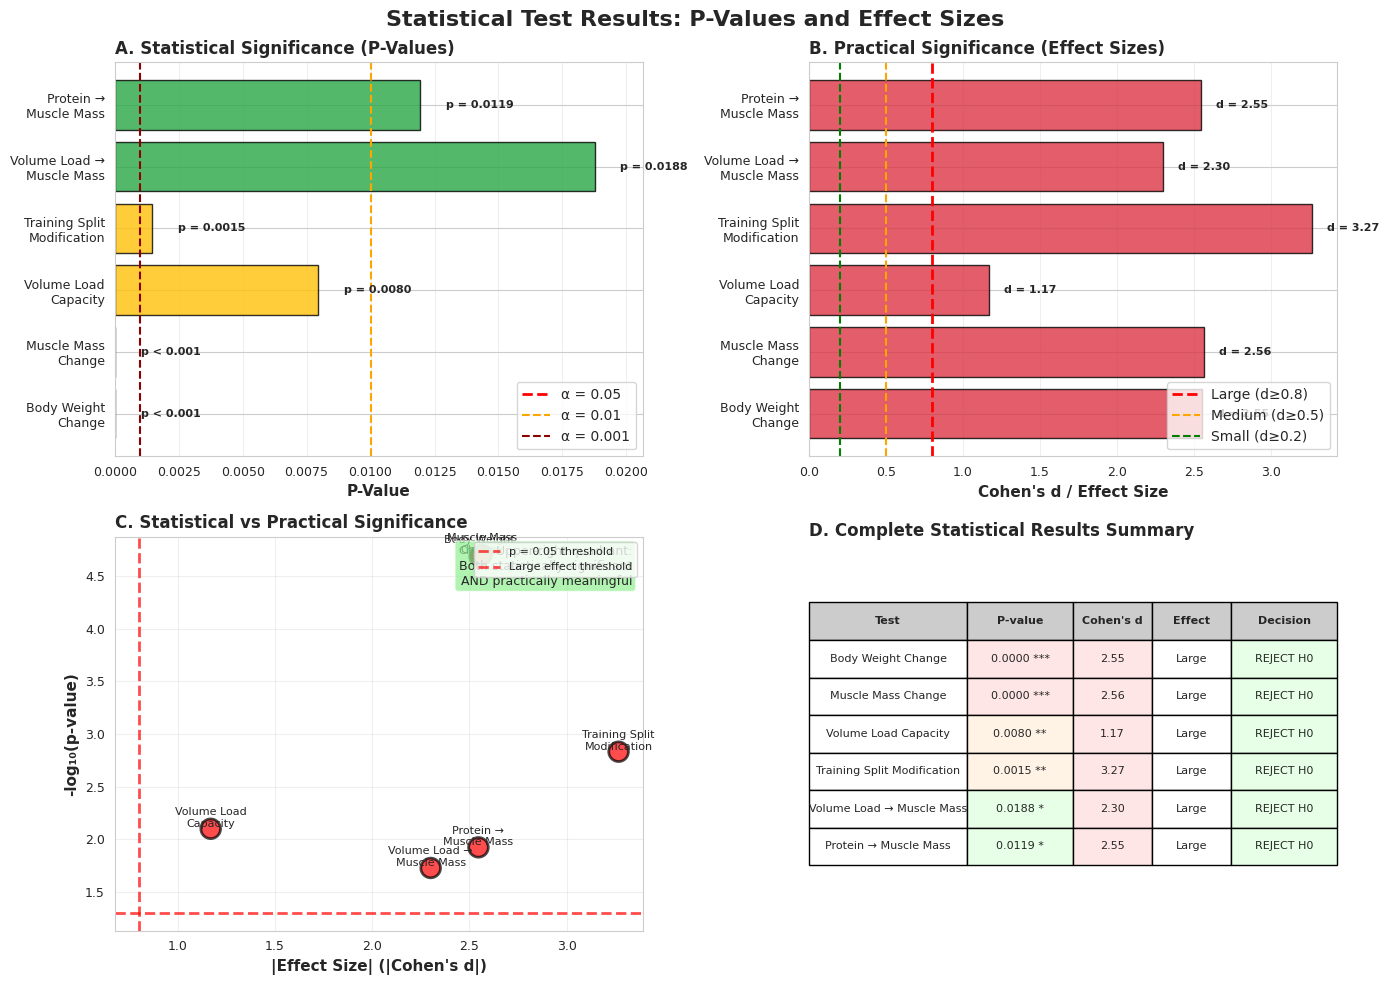

In [120]:
test_results = []

# Hypothesis 1A: Body Weight
baseline_weight = weekly_summary.iloc[0]['weight']
post_weights = weekly_summary[weekly_summary['week'] > 0]['weight'].values
t_weight, p_weight = stats.ttest_1samp(post_weights, baseline_weight)
d_weight = (np.mean(post_weights) - baseline_weight) / np.std(post_weights, ddof=1)
test_results.append(('Body Weight\nChange', t_weight, p_weight, d_weight, 'H1'))

# Hypothesis 1B: Muscle Mass
baseline_muscle = weekly_summary.iloc[0]['muscle_mass']
post_muscles = weekly_summary[weekly_summary['week'] > 0]['muscle_mass'].values
t_muscle, p_muscle = stats.ttest_1samp(post_muscles, baseline_muscle)
d_muscle = (np.mean(post_muscles) - baseline_muscle) / np.std(post_muscles, ddof=1)
test_results.append(('Muscle Mass\nChange', t_muscle, p_muscle, d_muscle, 'H1'))

# Hypothesis 1C: Volume Load
baseline_vol = training_weeks.iloc[0]['total_volume_load']
post_vols = training_weeks[training_weeks['week'] > 0]['total_volume_load'].values
t_vol, p_vol = stats.ttest_1samp(post_vols, baseline_vol)
d_vol = (np.mean(post_vols) - baseline_vol) / np.std(post_vols, ddof=1)
test_results.append(('Volume Load\nCapacity', t_vol, p_vol, d_vol, 'H1'))

# Hypothesis 3: Phase Comparison
phase1 = training_weeks[training_weeks['week'] <= 6]['total_volume_load'].values
phase2 = training_weeks[training_weeks['week'] >= 7]['total_volume_load'].values
t_phase, p_phase = stats.ttest_ind(phase1, phase2)
pooled_std = np.sqrt(((len(phase1)-1)*np.std(phase1, ddof=1)**2 +
                       (len(phase2)-1)*np.std(phase2, ddof=1)**2) /
                      (len(phase1)+len(phase2)-2))
d_phase = (np.mean(phase2) - np.mean(phase1)) / pooled_std
test_results.append(('Training Split\nModification', t_phase, p_phase, d_phase, 'H3'))

# Key Correlations
baseline_muscle_corr = intervention_data.iloc[0]['muscle_mass']
intervention_data['muscle_change'] = intervention_data['muscle_mass'] - baseline_muscle_corr

r_vol_muscle, p_vol_muscle = pearsonr(intervention_data['total_volume_load'],
                                       intervention_data['muscle_change'])
# Convert correlation to equivalent Cohen's d for visualization consistency
d_vol_muscle = 2 * r_vol_muscle / np.sqrt(1 - r_vol_muscle**2)
test_results.append(('Volume Load →\nMuscle Mass', r_vol_muscle, p_vol_muscle,
                     d_vol_muscle, 'Corr'))

r_prot_muscle, p_prot_muscle = pearsonr(intervention_data['avg_protein'],
                                         intervention_data['muscle_change'])
d_prot_muscle = 2 * r_prot_muscle / np.sqrt(1 - r_prot_muscle**2)
test_results.append(('Protein →\nMuscle Mass', r_prot_muscle, p_prot_muscle,
                     d_prot_muscle, 'Corr'))

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Statistical Test Results: P-Values and Effect Sizes',
             fontsize=16, fontweight='bold')

# Panel A: P-values bar chart
ax1 = axes[0, 0]
test_names = [r[0] for r in test_results]
p_values = [r[2] for r in test_results]
colors = ['#DC3545' if p < 0.001 else '#FFC107' if p < 0.01 else '#28A745' if p < 0.05
          else '#6C757D' for p in p_values]

bars = ax1.barh(test_names, p_values, color=colors, alpha=0.8, edgecolor='black')
ax1.axvline(x=0.05, color='red', linestyle='--', linewidth=2, label='α = 0.05')
ax1.axvline(x=0.01, color='orange', linestyle='--', linewidth=1.5, label='α = 0.01')
ax1.axvline(x=0.001, color='darkred', linestyle='--', linewidth=1.5, label='α = 0.001')
ax1.set_xlabel('P-Value', fontweight='bold')
ax1.set_title('A. Statistical Significance (P-Values)', fontweight='bold', loc='left')
ax1.legend(loc='lower right')
ax1.set_xlim(0, max(p_values) * 1.1)

# Add p-value labels on bars
for i, (bar, p) in enumerate(zip(bars, p_values)):
    label = f'p < 0.001' if p < 0.001 else f'p = {p:.4f}'
    ax1.text(p + 0.001, bar.get_y() + bar.get_height()/2, label,
            va='center', fontsize=8, fontweight='bold')

ax1.grid(True, alpha=0.3, axis='x')

# Panel B: Effect sizes bar chart
ax2 = axes[0, 1]
effect_sizes = [r[3] for r in test_results]
colors_es = ['#DC3545' if abs(d) >= 0.8 else '#FFC107' if abs(d) >= 0.5 else '#28A745'
             for d in effect_sizes]

bars_es = ax2.barh(test_names, effect_sizes, color=colors_es, alpha=0.8, edgecolor='black')
ax2.axvline(x=0.8, color='red', linestyle='--', linewidth=2, label='Large (d≥0.8)')
ax2.axvline(x=0.5, color='orange', linestyle='--', linewidth=1.5, label='Medium (d≥0.5)')
ax2.axvline(x=0.2, color='green', linestyle='--', linewidth=1.5, label='Small (d≥0.2)')
ax2.set_xlabel("Cohen's d / Effect Size", fontweight='bold')
ax2.set_title("B. Practical Significance (Effect Sizes)", fontweight='bold', loc='left')
ax2.legend(loc='lower right')

# Add effect size labels
for bar, d in zip(bars_es, effect_sizes):
    label = f'd = {d:.2f}'
    x_pos = d + 0.1 if d > 0 else d - 0.1
    ha = 'left' if d > 0 else 'right'
    ax2.text(x_pos, bar.get_y() + bar.get_height()/2, label,
            va='center', ha=ha, fontsize=8, fontweight='bold')

ax2.grid(True, alpha=0.3, axis='x')

# Panel C: Combined significance plot (p-value vs effect size)
ax3 = axes[1, 0]
# Use -log10(p) for better visualization
neg_log_p = [-np.log10(p) for p in p_values]

colors_combined = ['red' if p < 0.05 and abs(d) >= 0.8 else
                   'orange' if p < 0.05 and abs(d) >= 0.5 else
                   'yellow' if p < 0.05 else 'gray'
                   for p, d in zip(p_values, effect_sizes)]

scatter = ax3.scatter([abs(d) for d in effect_sizes], neg_log_p,
                     s=200, c=colors_combined, alpha=0.7, edgecolor='black', linewidth=2)

# Add quadrant lines
ax3.axhline(y=-np.log10(0.05), color='red', linestyle='--', linewidth=2,
           label='p = 0.05 threshold', alpha=0.7)
ax3.axvline(x=0.8, color='red', linestyle='--', linewidth=2,
           label='Large effect threshold', alpha=0.7)

# Label each point
for i, name in enumerate(test_names):
    ax3.annotate(name, (abs(effect_sizes[i]), neg_log_p[i]),
                fontsize=8, ha='center', va='bottom')

ax3.set_xlabel('|Effect Size| (|Cohen\'s d|)', fontweight='bold')
ax3.set_ylabel('-log₁₀(p-value)', fontweight='bold')
ax3.set_title('C. Statistical vs Practical Significance', fontweight='bold', loc='left')
ax3.legend(loc='upper right', fontsize=8)
ax3.grid(True, alpha=0.3)

# Add interpretation text
interp_text = "Upper-right quadrant:\nBoth statistically significant\nAND practically meaningful"
ax3.text(0.98, 0.98, interp_text, transform=ax3.transAxes,
        fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# Panel D: Summary table of all results
ax4 = axes[1, 1]
ax4.axis('off')

# Create formatted table
table_data = []
for name, t_or_r, p, d, test_type in test_results:
    sig_stars = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'
    effect_interp = 'Large' if abs(d) >= 0.8 else 'Medium' if abs(d) >= 0.5 else 'Small'
    decision = 'REJECT H0' if p < 0.05 else 'Fail to reject'

    table_data.append([
        name.replace('\n', ' '),
        f'{p:.4f} {sig_stars}',
        f'{d:.2f}',
        effect_interp,
        decision
    ])

table = ax4.table(cellText=table_data,
                 colLabels=['Test', 'P-value', "Cohen's d", 'Effect', 'Decision'],
                 cellLoc='center',
                 loc='center',
                 colWidths=[0.3, 0.2, 0.15, 0.15, 0.2])

table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 2)

# Color code the cells
for i in range(1, len(table_data) + 1):
    # P-value cell
    p_val = float(table_data[i-1][1].split()[0])
    if p_val < 0.001:
        table[(i, 1)].set_facecolor('#FFE6E6')
    elif p_val < 0.01:
        table[(i, 1)].set_facecolor('#FFF3E6')
    elif p_val < 0.05:
        table[(i, 1)].set_facecolor('#E6FFE6')

    # Effect size cell
    d_val = abs(float(table_data[i-1][2]))
    if d_val >= 0.8:
        table[(i, 2)].set_facecolor('#FFE6E6')
    elif d_val >= 0.5:
        table[(i, 2)].set_facecolor('#FFF3E6')

    # Decision cell
    if 'REJECT' in table_data[i-1][4]:
        table[(i, 4)].set_facecolor('#E6FFE6')

# Bold headers
for j in range(5):
    table[(0, j)].set_facecolor('#CCCCCC')
    table[(0, j)].set_text_props(weight='bold')

ax4.set_title('D. Complete Statistical Results Summary',
             fontweight='bold', loc='left', y=0.98)

plt.tight_layout()
plt.show()

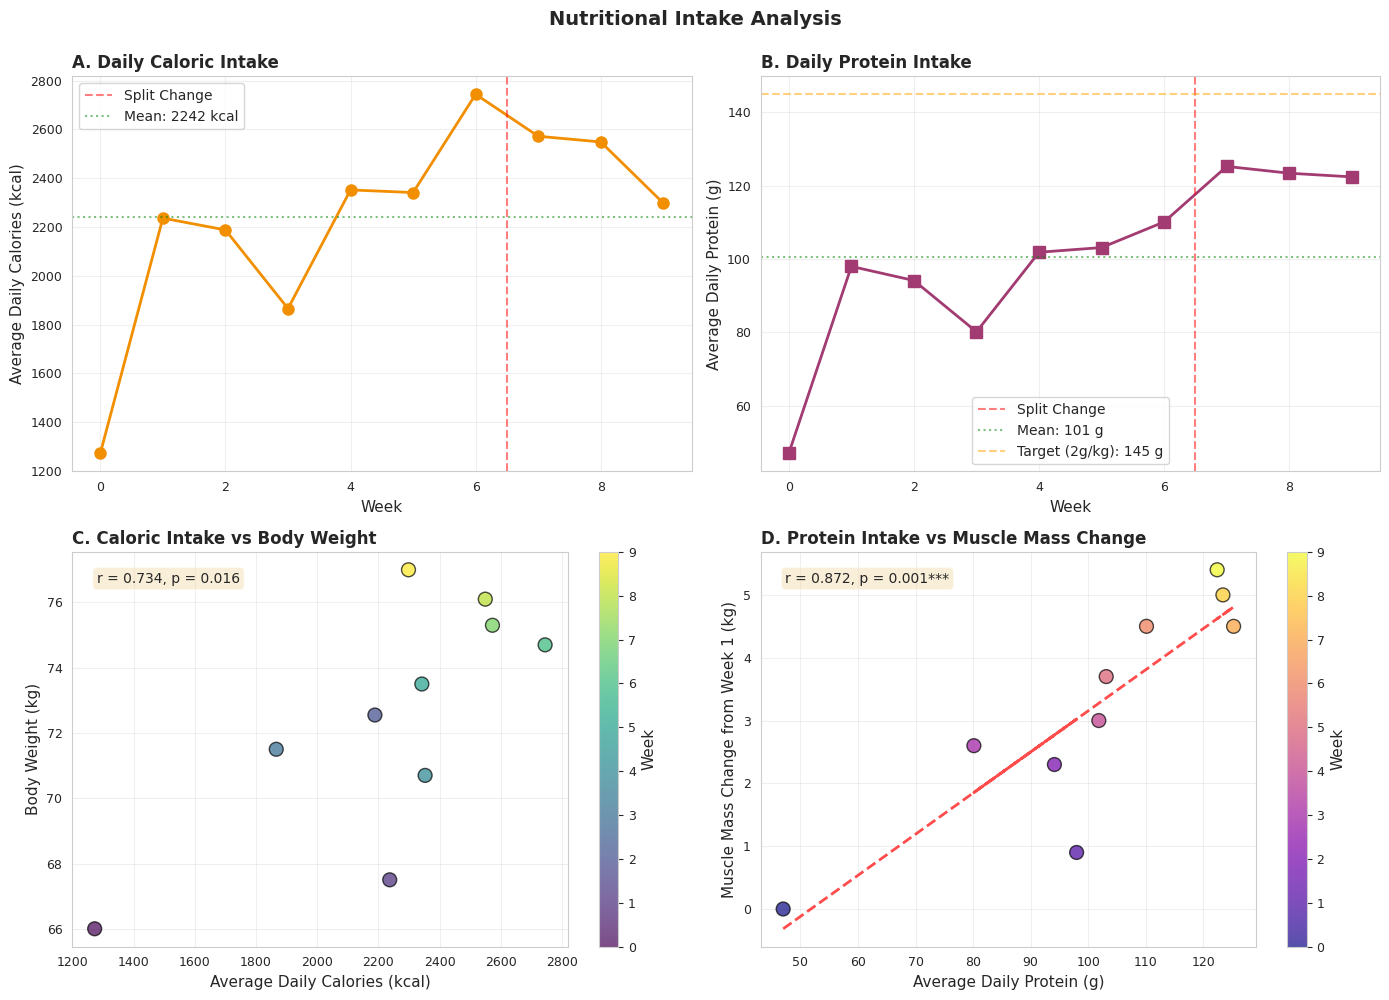

In [121]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Nutritional Intake Analysis', fontsize=14, fontweight='bold', y=0.995)

# Exclude Week 10
nutrition_weeks = weekly_summary[weekly_summary['week'] <= 9].copy()

# Panel A: Caloric Intake Over Time
ax1 = axes[0, 0]
ax1.plot(nutrition_weeks['week'], nutrition_weeks['avg_calories'],
         marker='o', linewidth=2, markersize=8, color='#F18F01')
ax1.axvline(x=6.5, color='red', linestyle='--', alpha=0.5, label='Split Change')
ax1.axhline(y=nutrition_weeks['avg_calories'].mean(), color='green',
            linestyle=':', alpha=0.5, label=f'Mean: {nutrition_weeks["avg_calories"].mean():.0f} kcal')
ax1.set_xlabel('Week')
ax1.set_ylabel('Average Daily Calories (kcal)')
ax1.set_title('A. Daily Caloric Intake', fontweight='bold', loc='left')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Panel B: Protein Intake Over Time
ax2 = axes[0, 1]
ax2.plot(nutrition_weeks['week'], nutrition_weeks['avg_protein'],
         marker='s', linewidth=2, markersize=8, color='#A23B72')
ax2.axvline(x=6.5, color='red', linestyle='--', alpha=0.5, label='Split Change')
ax2.axhline(y=nutrition_weeks['avg_protein'].mean(), color='green',
            linestyle=':', alpha=0.5, label=f'Mean: {nutrition_weeks["avg_protein"].mean():.0f} g')
# Add protein target line (2g per kg body weight recommendation)
avg_weight = nutrition_weeks['weight'].mean()
target_protein = avg_weight * 2
ax2.axhline(y=target_protein, color='orange', linestyle='--', alpha=0.5,
            label=f'Target (2g/kg): {target_protein:.0f} g')
ax2.set_xlabel('Week')
ax2.set_ylabel('Average Daily Protein (g)')
ax2.set_title('B. Daily Protein Intake', fontweight='bold', loc='left')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Panel C: Calories vs Body Weight
ax3 = axes[1, 0]
sc = ax3.scatter(nutrition_weeks['avg_calories'], nutrition_weeks['weight'],
                c=nutrition_weeks['week'], cmap='viridis', s=100, alpha=0.7, edgecolor='black')
ax3.set_xlabel('Average Daily Calories (kcal)')
ax3.set_ylabel('Body Weight (kg)')
ax3.set_title('C. Caloric Intake vs Body Weight', fontweight='bold', loc='left')
ax3.grid(True, alpha=0.3)
# Add correlation coefficient
r_cal_weight, p_cal_weight = pearsonr(nutrition_weeks['avg_calories'], nutrition_weeks['weight'])
ax3.text(0.05, 0.95, f'r = {r_cal_weight:.3f}, p = {p_cal_weight:.3f}',
        transform=ax3.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
cbar = plt.colorbar(sc, ax=ax3)
cbar.set_label('Week')

# Panel D: Protein vs Muscle Mass Change
ax4 = axes[1, 1]
baseline_muscle = nutrition_weeks.iloc[0]['muscle_mass']
nutrition_weeks_copy = nutrition_weeks.copy()
nutrition_weeks_copy['muscle_change'] = nutrition_weeks_copy['muscle_mass'] - baseline_muscle
sc2 = ax4.scatter(nutrition_weeks_copy['avg_protein'], nutrition_weeks_copy['muscle_change'],
                 c=nutrition_weeks_copy['week'], cmap='plasma', s=100, alpha=0.7, edgecolor='black')
ax4.set_xlabel('Average Daily Protein (g)')
ax4.set_ylabel('Muscle Mass Change from Week 1 (kg)')
ax4.set_title('D. Protein Intake vs Muscle Mass Change', fontweight='bold', loc='left')
ax4.grid(True, alpha=0.3)
# Add regression line
z = np.polyfit(nutrition_weeks_copy['avg_protein'], nutrition_weeks_copy['muscle_change'], 1)
p = np.poly1d(z)
ax4.plot(nutrition_weeks_copy['avg_protein'], p(nutrition_weeks_copy['avg_protein']),
        "r--", alpha=0.7, linewidth=2)
# Add correlation coefficient
r_prot_muscle, p_prot_muscle = pearsonr(nutrition_weeks_copy['avg_protein'],
                                         nutrition_weeks_copy['muscle_change'])
ax4.text(0.05, 0.95, f'r = {r_prot_muscle:.3f}, p = {p_prot_muscle:.3f}***',
        transform=ax4.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
cbar2 = plt.colorbar(sc2, ax=ax4)
cbar2.set_label('Week')

plt.tight_layout()
# plt.savefig('/mnt/user-data/outputs/figure4_nutritional_intake_analysis.png',
#             dpi=300, bbox_inches='tight')
# print("✓ Saved: figure4_nutritional_intake_analysis.png")
print()